<a href="https://colab.research.google.com/github/ShashankDsa/Project/blob/main/Chennai_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
chn_df = pd.read_csv(r"/content/sample_data/train-chennai-sale.csv")
chn_df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [3]:
chn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [4]:
chn_df.shape

(7109, 22)

In [5]:
#missing values in each column
chn_df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
chn_df.head(15)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,...,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,...,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,...,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,No,...,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,...,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650


### PRT_ID

In [7]:
chn_df.PRT_ID.isna().sum()

0

In [8]:
chn_df.PRT_ID.dtype

dtype('O')

In [9]:
len(chn_df.PRT_ID.unique())

7109

In [10]:
chn_df.drop('PRT_ID',axis='columns', inplace=True)

### Inference
PRT_ID is a column containing unique ID's. I have dropped this column as it does not help in our modelling or predictions.

### AREA

In [11]:
chn_df.AREA.isna().sum()

0

In [12]:
chn_df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [13]:
chn_df.loc[(chn_df.AREA=='Karapakam'),'AREA']='Karapakkam'
chn_df.loc[(chn_df.AREA=='TNagar'),'AREA']='T Nagar'
chn_df.loc[(chn_df.AREA=='Chrompt'),'AREA']='Chrompet'
chn_df.loc[(chn_df.AREA=='Chrmpet'),'AREA']='Chrompet'
chn_df.loc[(chn_df.AREA=='Chormpet'),'AREA']='Chrompet'
chn_df.loc[(chn_df.AREA=='Ana Nagar'),'AREA']='Anna Nagar'
chn_df.loc[(chn_df.AREA=='Ann Nagar'),'AREA']='Anna Nagar'
chn_df.loc[(chn_df.AREA=='Adyr'),'AREA']='Adyar'
chn_df.loc[(chn_df.AREA=='Velchery'),'AREA']='Velachery'
chn_df.loc[(chn_df.AREA=='KKNagar'),'AREA']='KK Nagar'
print(chn_df['AREA'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']


In [14]:
chn_df.AREA.dtype

dtype('O')

In [15]:
chn_df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

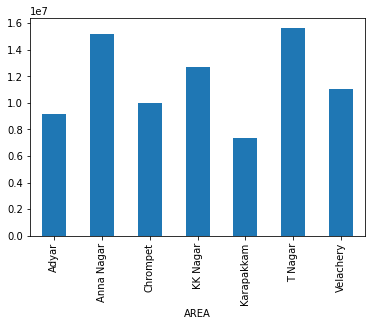

In [16]:
chn_df.groupby("AREA")["SALES_PRICE"].mean().plot.bar()

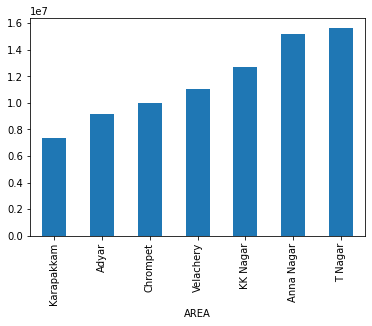

In [17]:
chn_df.groupby("AREA")["SALES_PRICE"].mean().sort_values(ascending= True).plot.bar()

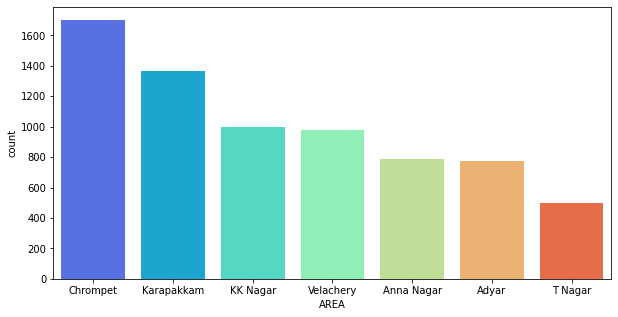

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x="AREA", data=chn_df, order = chn_df['AREA'].value_counts().index, palette = 'rainbow')

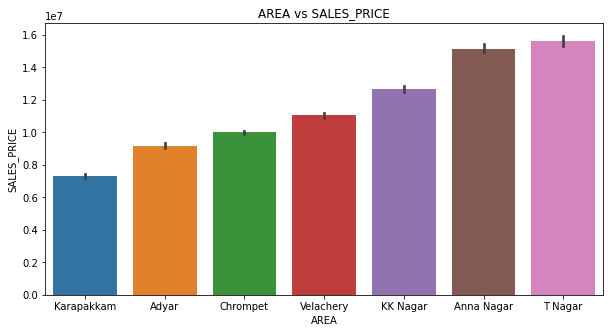

In [19]:
f = plt.figure(figsize = (10,5))
sns.barplot(x = chn_df.AREA,y = chn_df.SALES_PRICE, order = chn_df.groupby(['AREA'])['SALES_PRICE'].mean().reset_index().sort_values(['SALES_PRICE'])['AREA']);
plt.title("AREA vs SALES_PRICE")
ax = plt.gca()

### Inference
1. There is a linear relationship between AREA and SALES_PRICE.
2. There is an order in the categorical variable, Label encoding will be done.



### INT_SQFT

In [20]:
chn_df.INT_SQFT.isna().sum()

0

In [21]:
chn_df.INT_SQFT.dtype

dtype('int64')

In [22]:
chn_df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [23]:
q3 = chn_df.INT_SQFT.quantile(0.75)
q1 = chn_df.INT_SQFT.quantile(0.25)
iqr = q3 - q1
iqr

751.0

In [24]:
q3 + 1.5*iqr

2870.5

In [25]:
q1 - 1.5*iqr

-133.5

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


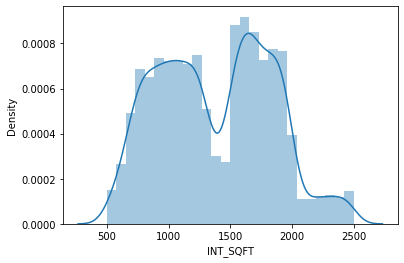

In [26]:
sns.distplot(chn_df.INT_SQFT)

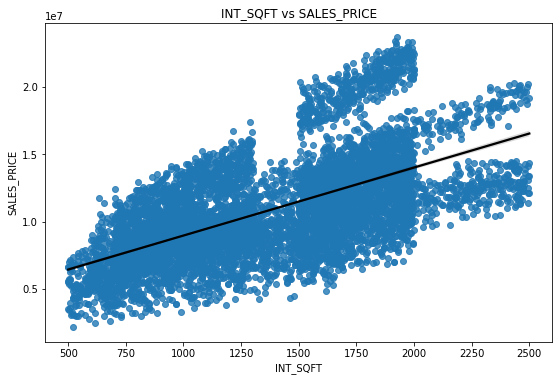

In [27]:
f = plt.figure(figsize = (20,27))
plt.subplot(421)
sns.regplot(x = chn_df.INT_SQFT,y = chn_df.SALES_PRICE, line_kws = {'color' : 'black'});
plt.title("INT_SQFT vs SALES_PRICE")
ax = plt.gca()

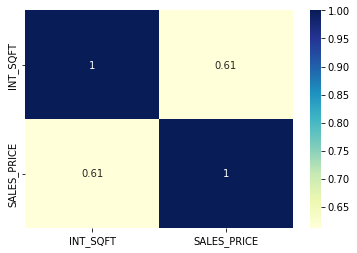

In [28]:
dataplot=sns.heatmap(chn_df[['INT_SQFT','SALES_PRICE']].corr(),cmap="YlGnBu", annot=True)

### Inference
1.   No Outliers found for INT_SQFT
2.   The Minimum Square feet is 500. Maximum Square feet is 2500. The houses 
     range from 500 to 2500sq.ft. 50% of the houses are in the range         1300        1400 sq_ft.
3.   There is a linear relationship between sales and INT_SQFT
4.   No Transformation required.
5.   There is a good correlation between INT_SQFT and SALES_PRICE.




### DATE_SALE

In [29]:
chn_df.DATE_SALE.isna().sum()

0

In [30]:
chn_df.DATE_SALE.dtype

dtype('O')

In [31]:
chn_df.DATE_SALE = chn_df.DATE_SALE.astype('datetime64')

In [32]:
chn_df.DATE_SALE = pd.to_datetime(chn_df['DATE_SALE'], format = '%d-%m-%Y').dt.strftime('%d-%m-%Y')
chn_df.DATE_SALE.values[:50]

array(['05-04-2011', '19-12-2006', '02-04-2012', '13-03-2010',
       '10-05-2009', '09-11-2014', '04-05-2007', '13-03-2006',
       '04-06-2011', '22-06-2006', '19-10-2006', '16-02-2009',
       '02-11-2010', '01-01-2007', '11-11-2010', '09-12-2009',
       '11-04-2009', '25-12-2011', '04-05-2008', '07-02-2012',
       '19-04-2013', '13-12-2008', '05-06-2009', '23-07-2010',
       '13-05-2013', '19-07-2014', '11-10-2011', '11-12-2010',
       '19-08-2011', '18-08-2013', '04-01-2009', '15-08-2011',
       '26-03-2012', '28-04-2006', '22-11-2009', '05-09-2010',
       '23-05-2010', '28-01-2011', '11-07-2011', '24-01-2009',
       '21-12-2012', '10-03-2011', '18-08-2009', '23-03-2010',
       '12-06-2009', '09-11-2011', '18-11-2006', '11-12-2009',
       '11-06-2010', '10-12-2006'], dtype=object)

In [33]:
chn_df.DATE_SALE.dtype

dtype('O')

In [34]:
#Checking the first and last sale date of each area.
chn_df.groupby(['AREA']).agg({'DATE_SALE': [np.min,np.max]})

DATE_SALE            
                  amin        amax
AREA                              
Adyar       01-01-2007  31-12-2011
Anna Nagar  01-01-2007  31-12-2011
Chrompet    01-01-2007  31-12-2014
KK Nagar    01-01-2009  31-12-2009
Karapakkam  01-01-2011  31-12-2009
T Nagar     01-01-2015  31-12-2007
Velachery   01-01-2005  31-12-2004

In [35]:
da = dict(pd.DatetimeIndex(chn_df['DATE_SALE']).year.value_counts())
da = pd.Series(da)
da = da.to_frame()

In [36]:
da.rename(columns = {'index' : 'Year', 0 : 'Count'},inplace = True)
da.reset_index(inplace = True)
da.rename(columns = {'index' : 'Year'},inplace = True)
da

,Year,Count
0,2010,1341
1,2011,1300
2,2009,1122
3,2008,814
4,2012,654
5,2007,651
6,2013,365
7,2014,335
8,2006,253
9,2004,116


Text(0.5, 1.0, 'Number of DATE_SALE over the years')

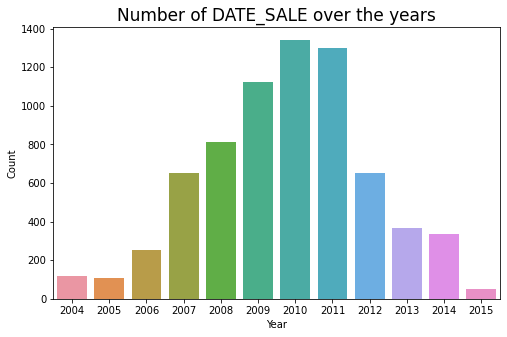

In [37]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x="Year",y = 'Count',data = da)
plt.title('Number of DATE_SALE over the years', fontsize=17)

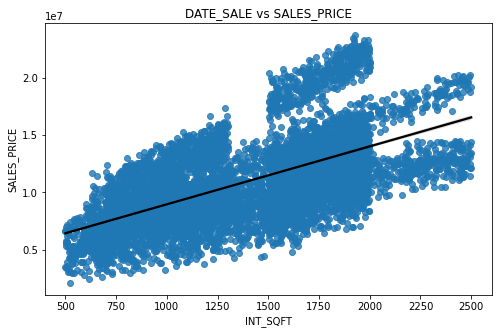

In [38]:
f = plt.figure(figsize = (8,5))
sns.regplot(x = chn_df.INT_SQFT,y = chn_df.SALES_PRICE, line_kws = {'color' : 'black'});
plt.title("DATE_SALE vs SALES_PRICE")
ax = plt.gca()

### Inference

1.   As per the dataset, Maximum number of house sales happened in the year 2010
2.   Minimum number of house sales happened in the year 2015
3.   There is a gradual increase of sales from 2005 to 2010. After 2010, the sales start to decline.
4.   The sales are at its peak in the year 2010. Our models will be able to predict the results more accurately from 2008 to 2012, compared to rest of the years because of data availability.



### DIST_MAINROAD

In [39]:
chn_df.DIST_MAINROAD.isna().sum()

0

In [40]:
chn_df.DIST_MAINROAD.dtype

dtype('int64')

In [41]:
chn_df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [42]:
q3 = chn_df.DIST_MAINROAD.quantile(0.75)
q1 = chn_df.DIST_MAINROAD.quantile(0.25)
iqr = q3 - q1
iqr

98.0

In [43]:
q3 + 1.5*iqr

295.0

In [44]:
q1 - 1.5*iqr

-97.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


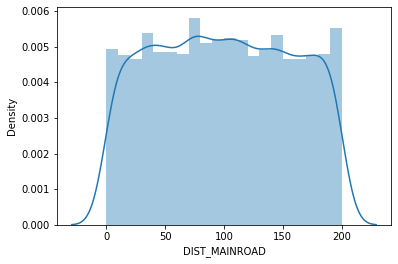

In [45]:
sns.distplot(chn_df.DIST_MAINROAD)

Seems like a uniform distribution. No skew

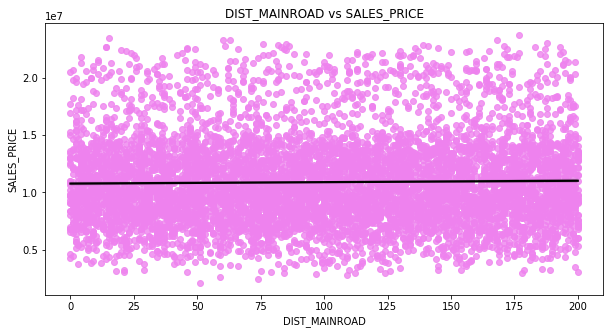

In [46]:
plt.figure(figsize = (10,5))
sns.regplot(x = chn_df.DIST_MAINROAD,y = chn_df.SALES_PRICE, line_kws = {'color' : 'black'}, scatter_kws = {'color' : 'violet'});
plt.title("DIST_MAINROAD vs SALES_PRICE")
ax = plt.gca()

### Inference

1.   There are some houses that are on the main road itself. The maximum distance of the houses sold from the mainroad is 200m.
2.   No relationship found between DIST_MAINROAD and SALES_PRICE.
Tranformation will not make much of a difference in this case. 
3.   The column will be dropped for the Linear Regression model.



### N_BEDROOM

In [47]:
chn_df.N_BEDROOM.isna().sum()

1

In [48]:
chn_df.dropna(subset = ['N_BEDROOM'],inplace = True)

In [49]:
chn_df.reset_index(drop = True, inplace = True)

In [50]:
chn_df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,05-04-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,02-04-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,10-05-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7103,Karapakkam,598,01-03-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7104,Velachery,1897,04-08-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7105,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7106,Karapakkam,787,08-03-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [51]:
chn_df.N_BEDROOM.dtype

dtype('float64')

In [52]:
chn_df.N_BEDROOM = chn_df.N_BEDROOM.astype('int64')

In [53]:
chn_df.N_BEDROOM.dtype

dtype('int64')

In [54]:
chn_df.N_BEDROOM.value_counts()

1    3795
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

In [55]:
chn_df.N_BEDROOM.unique()

array([1, 2, 3, 4])

Text(0.5, 1.0, 'Distribution of N_BEDROOM')

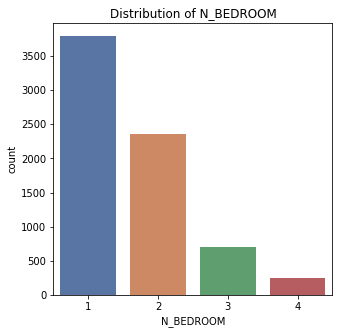

In [56]:
plt.figure(figsize=(5,5))
sns.countplot(x="N_BEDROOM", data=chn_df, palette = 'deep', order = chn_df['N_BEDROOM'].value_counts().index)
plt.title("Distribution of N_BEDROOM")

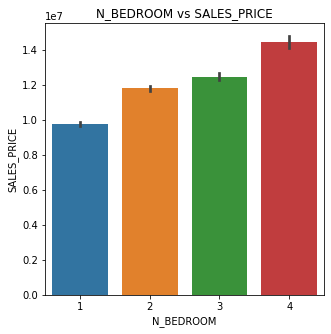

In [57]:
plt.figure(figsize = (5,5))
sns.barplot(x = chn_df.N_BEDROOM,y = chn_df.SALES_PRICE, order = chn_df.groupby(['N_BEDROOM'])['SALES_PRICE'].mean().reset_index().sort_values(['SALES_PRICE'])['N_BEDROOM']);
plt.title("N_BEDROOM vs SALES_PRICE")
ax = plt.gca()


### Inference

1.   There is a linear relationship between N_BEDROOM and SALES_PRICE.
2.   Label encoding can be done.



###N_BATHROOM


In [58]:
chn_df.N_BATHROOM.isna().sum()

5

In [59]:
chn_df.loc[chn_df.N_BATHROOM.isna()]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
70,Anna Nagar,1589,22-03-2010,39,1,NaN,4,Partial,No,02-04-1966,...,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,451857,85486,12212350
5086,Chrompet,1016,08-02-2012,105,1,NaN,3,AbNormal,Yes,10-08-1980,...,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,330086,106479,10647920
6133,Chrompet,916,08-02-2012,173,1,NaN,3,Normal Sale,Yes,12-08-1974,...,ELO,Paved,RL,3.4,3.5,3.0,NaN,265423,44237,8847420
6370,Chrompet,1035,11-06-2012,90,1,NaN,3,Partial,No,14-11-1981,...,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,223403,24823,8274200
6534,Anna Nagar,1864,03-05-2007,184,2,NaN,5,Family,Yes,07-03-1997,...,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,575606,124455,15556920


In [60]:
chn_df.N_BATHROOM.unique()


array([ 1.,  2., nan])

In [61]:
chn_df.N_BATHROOM.value_counts()

1.0    5588
2.0    1515
Name: N_BATHROOM, dtype: int64

In [62]:
chn_df.groupby(['N_BATHROOM'])['SALES_PRICE'].mean()


N_BATHROOM
1.0    1.068107e+07
2.0    1.168299e+07
Name: SALES_PRICE, dtype: float64

In [63]:
chn_df.loc[chn_df.N_BATHROOM == 1.0]['SALES_PRICE'].mean()
#Mean of this value is closer to the Sales price of 'N_BATHROOM' nan values
#imputing 1.0 which is the mode of N_BATHROOM to the nan values

10681074.617036507

In [64]:
chn_df.N_BATHROOM.mode()

0    1.0
dtype: float64

In [65]:
chn_df.N_BATHROOM = chn_df.N_BATHROOM.fillna(chn_df.N_BATHROOM.mode()[0])

In [66]:
df = chn_df[chn_df['N_BATHROOM'].isna()]
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE


In [67]:
chn_df.N_BATHROOM.unique()

array([1., 2.])

In [68]:
chn_df.N_BATHROOM = chn_df.N_BATHROOM.astype('int64')

In [69]:
chn_df.N_BATHROOM.dtype

dtype('int64')

Text(0.5, 1.0, 'Distribution of N_BATHROOM')

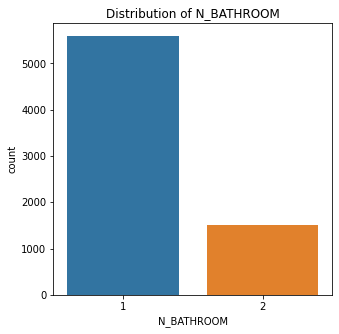

In [70]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="N_BATHROOM", data=chn_df, order = chn_df['N_BATHROOM'].value_counts().index)
plt.title("Distribution of N_BATHROOM")

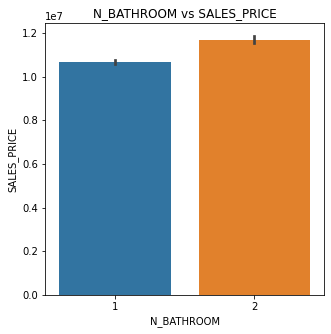

In [71]:
plt.figure(figsize=(5,5))
sns.barplot(x = chn_df.N_BATHROOM,y = chn_df.SALES_PRICE, order = chn_df.groupby(['N_BATHROOM'])['SALES_PRICE'].mean().reset_index().sort_values(['SALES_PRICE'])['N_BATHROOM']);
plt.title("N_BATHROOM vs SALES_PRICE")
ax = plt.gca()

### Inference


1.   Houses with 1 bathroom is sold most.
2.   It follows an order - Label encoding is done.
3.   There is a linear relationship between N_BATHROOM and SALES_PRICE



###N_ROOM

In [72]:
chn_df.N_ROOM.unique()

array([3, 5, 4, 2, 6])

In [73]:
chn_df.N_ROOM.dtype

dtype('int64')

In [74]:
chn_df.N_ROOM.isna().sum()

0

In [75]:
chn_df.N_ROOM.value_counts()

4    2562
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

Text(0.5, 1.0, 'Distribution of N_ROOM')

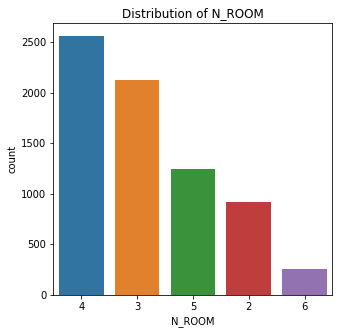

In [76]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="N_ROOM", data=chn_df, order = chn_df['N_ROOM'].value_counts().index)
plt.title("Distribution of N_ROOM")

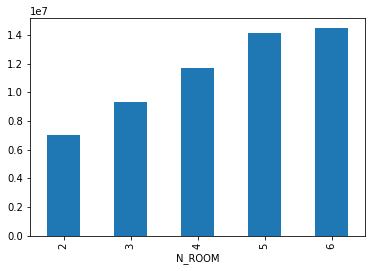

In [77]:
chn_df.groupby("N_ROOM")["SALES_PRICE"].mean().plot.bar()

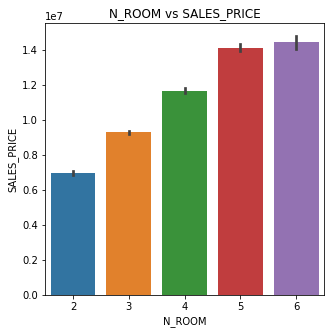

In [78]:
plt.figure(figsize=(5,5))
sns.barplot(x = chn_df.N_ROOM,y = chn_df.SALES_PRICE, order = chn_df.groupby(['N_ROOM'])['SALES_PRICE'].mean().reset_index().sort_values(['SALES_PRICE'])['N_ROOM']);
plt.title("N_ROOM vs SALES_PRICE")
ax = plt.gca()

### Inference


1.   There is a linear relationship between N_ROOM and SALES_PRICE
2.   Label Encoding is done
3.   Houses with 4 and 3 rooms were sold 
4.   Houses with 6 rooms were comparitively rare.


### SALE_COND


In [79]:
chn_df.SALE_COND.isna().sum()

0

In [80]:
chn_df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [81]:
chn_df.loc[(chn_df.SALE_COND=='Ab Normal'),'SALE_COND']='AbNormal'
chn_df.loc[(chn_df.SALE_COND=='Partiall'),'SALE_COND']='Partial'
chn_df.loc[(chn_df.SALE_COND=='PartiaLl'),'SALE_COND']='Partial'
chn_df.loc[(chn_df.SALE_COND=='Adj Land'),'SALE_COND']='AdjLand'
print(chn_df['SALE_COND'].unique())

['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']


In [82]:
chn_df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

Text(0.5, 1.0, 'Distribution of SALE_COND')

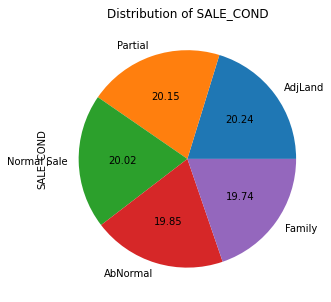

In [83]:
plt.figure(figsize=(5,5))
ax = chn_df.SALE_COND.value_counts().plot(kind="pie", autopct="%.2f")
plt.title("Distribution of SALE_COND")

Text(0.5, 1.0, 'Distribution of SALE_COND')

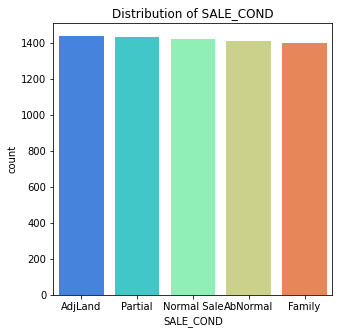

In [84]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="SALE_COND", data=chn_df, order = chn_df['SALE_COND'].value_counts().index, palette = 'rainbow')
plt.title("Distribution of SALE_COND")

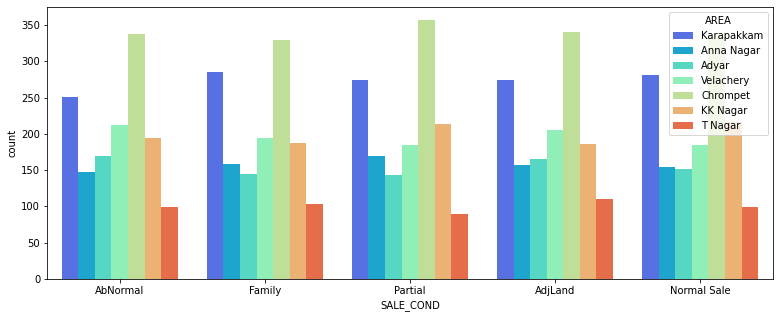

In [85]:
plt.figure(figsize=(13,5))
sns.countplot(x ="SALE_COND",hue = 'AREA',data=chn_df, palette='rainbow')

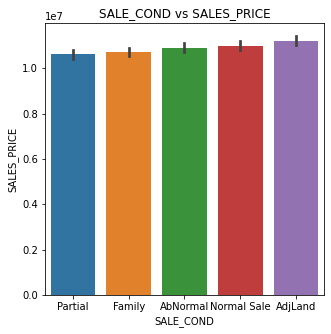

In [86]:
plt.figure(figsize=(5,5))
sns.barplot(x = chn_df.SALE_COND,y = chn_df.SALES_PRICE, order = chn_df.groupby(['SALE_COND'])['SALES_PRICE'].mean().reset_index().sort_values(['SALES_PRICE'])['SALE_COND']);
plt.title("SALE_COND vs SALES_PRICE")
ax = plt.gca()

### Inference

1.   There is a linear relationship between SALE_COND and SALES_PRICE.
2.   Label Encoding is done




### PARK_FACIL


In [87]:
chn_df.PARK_FACIL.isna().sum()

0

In [88]:
chn_df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [89]:
chn_df.PARK_FACIL.replace({'Noo' : 'No'},inplace = True)

In [90]:
chn_df.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [91]:
chn_df.PARK_FACIL.value_counts()

Yes    3587
No     3521
Name: PARK_FACIL, dtype: int64

In [92]:
chn_df.PARK_FACIL = chn_df.PARK_FACIL.map({'Yes' : 1, 'No' : 0})

Text(0.5, 1.0, 'Distribution of PARK_FACIL')

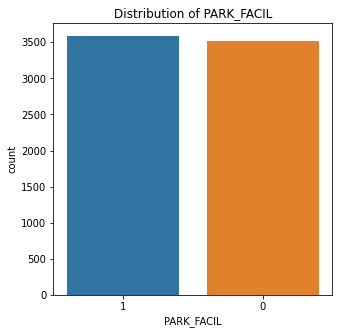

In [93]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="PARK_FACIL", data=chn_df, order = chn_df['PARK_FACIL'].value_counts().index)
plt.title("Distribution of PARK_FACIL")

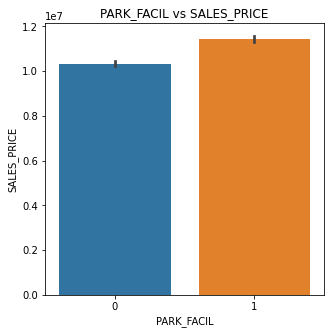

In [94]:
plt.figure(figsize=(5,5))
sns.barplot(x = chn_df.PARK_FACIL,y = chn_df.SALES_PRICE, order = chn_df.groupby(['PARK_FACIL'])['SALES_PRICE'].mean().reset_index().sort_values(['SALES_PRICE'])['PARK_FACIL']);
plt.title("PARK_FACIL vs SALES_PRICE")
ax = plt.gca()

### Inference


1.   Houses with parking facility slightly is slightly higher in sales than the houses with no parking facility. Although there isn't much of a difference.
2.   There is a linear relationship between PARK_FACIL and SALES_PRICE
3.   Label Encoding is done



### DATE_BUILD

In [95]:
chn_df.DATE_BUILD.dtype

dtype('O')

In [96]:
chn_df.DATE_BUILD.isnull().sum()

0

In [97]:
chn_df.DATE_BUILD = chn_df.DATE_BUILD.astype('datetime64')

In [98]:
chn_df.DATE_BUILD.values[:20]

array(['1967-05-15T00:00:00.000000000', '1995-12-22T00:00:00.000000000',
       '1992-09-02T00:00:00.000000000', '1988-03-18T00:00:00.000000000',
       '1979-10-13T00:00:00.000000000', '2009-12-09T00:00:00.000000000',
       '1979-12-04T00:00:00.000000000', '1996-03-15T00:00:00.000000000',
       '1977-04-14T00:00:00.000000000', '1991-06-26T00:00:00.000000000',
       '1978-10-26T00:00:00.000000000', '1972-02-26T00:00:00.000000000',
       '1991-02-16T00:00:00.000000000', '1981-07-01T00:00:00.000000000',
       '1956-11-24T00:00:00.000000000', '2000-09-14T00:00:00.000000000',
       '1991-09-11T00:00:00.000000000', '1975-03-01T00:00:00.000000000',
       '1978-04-13T00:00:00.000000000', '1970-07-13T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [99]:
chn_df.DATE_BUILD = pd.to_datetime(chn_df['DATE_BUILD']).dt.strftime('%d-%m-%Y')

In [100]:
chn_df.DATE_BUILD.values[:20]

array(['15-05-1967', '22-12-1995', '02-09-1992', '18-03-1988',
       '13-10-1979', '09-12-2009', '04-12-1979', '15-03-1996',
       '14-04-1977', '26-06-1991', '26-10-1978', '26-02-1972',
       '16-02-1991', '01-07-1981', '24-11-1956', '14-09-2000',
       '11-09-1991', '01-03-1975', '13-04-1978', '13-07-1970'],
      dtype=object)

In [101]:
dat = dict(pd.DatetimeIndex(chn_df['DATE_BUILD']).year.value_counts())
dat = pd.Series(dat)
dat = dat.to_frame()

In [102]:
dat.rename(columns = {'index' : 'Year', 0 : 'Count'},inplace = True)
dat.reset_index(inplace = True)
dat.rename(columns = {'index' : 'Year'},inplace = True)
dat

,Year,Count
0,1985,200
1,1988,197
2,2002,194
3,1990,191
4,1999,189
...,...,...
57,1954,11
58,2010,9
59,1951,6
60,1949,2


Text(0.5, 1.0, 'DATE_BUILD over the years')

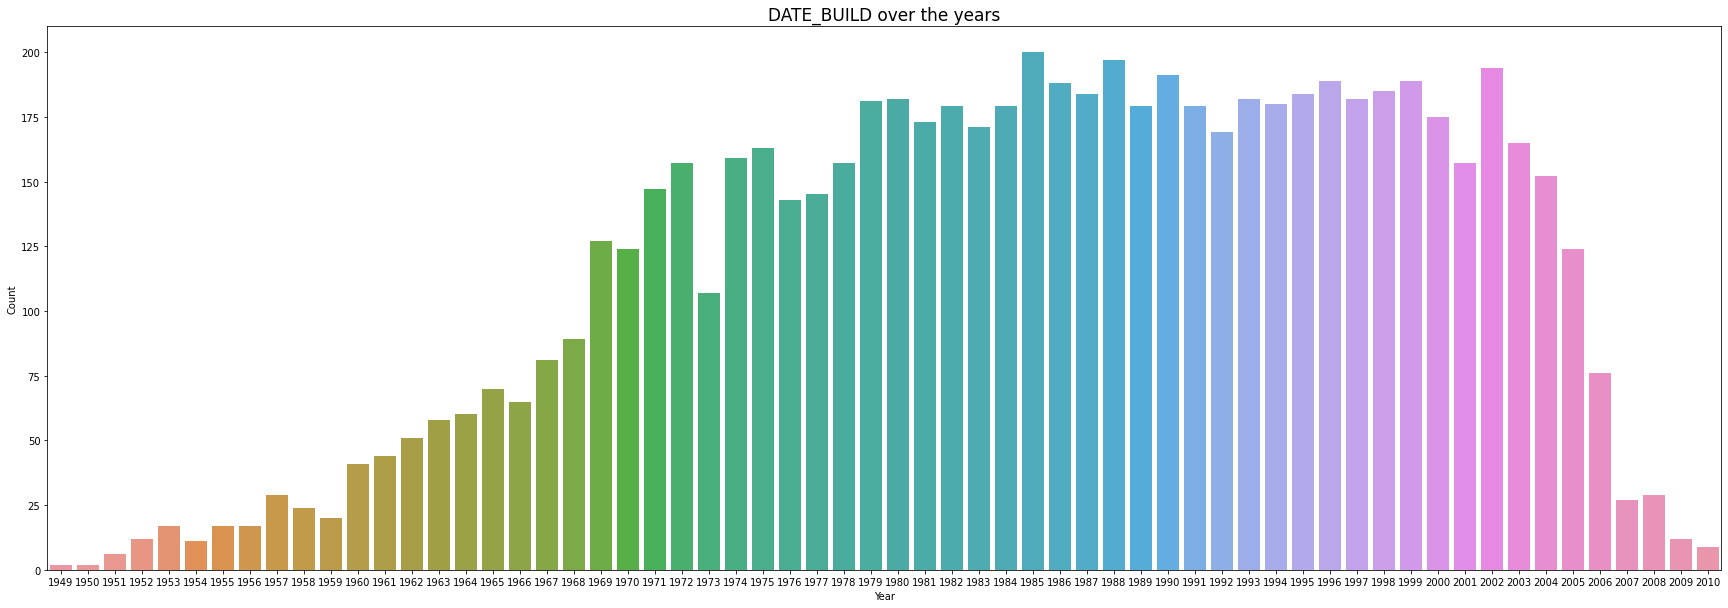

In [103]:
plt.figure(figsize=(30,10))
ax = sns.barplot(x="Year",y = 'Count',data = dat)
plt.title('DATE_BUILD over the years', fontsize=17)

### Inference

1.   The highest number of buildings and houses were built in 1986 
2.   We can use date sale and date build to create a new feature called "House Age"



### HOUSE AGE(Newly Constructed)

In [104]:
chn_df['DATE_SALE']= pd.to_datetime(chn_df['DATE_SALE'])
chn_df['DATE_BUILD']=pd.to_datetime(chn_df['DATE_BUILD'])

In [105]:
chn_df['YEAR_SOLD']=chn_df['DATE_SALE'].dt.year
chn_df['YEAR_BUILD']=chn_df['DATE_BUILD'].dt.year

In [106]:
chn_df['HOUSE_AGE']=chn_df['YEAR_SOLD']-chn_df['YEAR_BUILD']
chn_df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SOLD,YEAR_BUILD,HOUSE_AGE
0,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,1,1967-05-15,...,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967,44
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,...,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995,11
2,Adyar,909,2012-02-04,70,1,1,3,AbNormal,1,1992-02-09,...,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992,20
3,Velachery,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,...,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988,22
4,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,1,1979-10-13,...,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979,30


In [107]:
chn_df['HOUSE_AGE']

0       44
1       11
2       20
3       22
4       30
        ..
7103    49
7104     9
7105    28
7106    32
7107    44
Name: HOUSE_AGE, Length: 7108, dtype: int64

In [108]:
chn_df.iloc[7104]

AREA                       Velachery
INT_SQFT                        1897
DATE_SALE        2004-04-08 00:00:00
DIST_MAINROAD                     52
N_BEDROOM                          3
N_BATHROOM                         2
N_ROOM                             5
SALE_COND                     Family
PARK_FACIL                         1
DATE_BUILD       1995-04-11 00:00:00
BUILDTYPE                     Others
UTILITY_AVAIL                 NoSeWa
STREET                     No Access
MZZONE                            RH
QS_ROOMS                         3.6
QS_BATHROOM                      4.5
QS_BEDROOM                       3.3
QS_OVERALL                      3.92
REG_FEE                       346191
COMMIS                        205551
SALES_PRICE                 10818480
YEAR_SOLD                       2004
YEAR_BUILD                      1995
HOUSE_AGE                          9
Name: 7104, dtype: object

In [109]:
chn_df['HOUSE_AGE'].describe()

count    7108.000000
mean       24.275886
std        12.334989
min         3.000000
25%        14.000000
50%        23.000000
75%        34.000000
max        55.000000
Name: HOUSE_AGE, dtype: float64

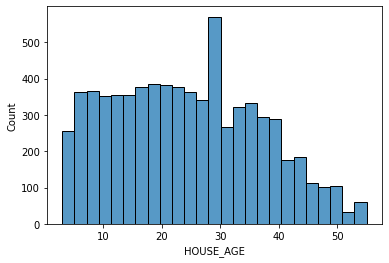

In [110]:
sns.histplot(chn_df['HOUSE_AGE'])

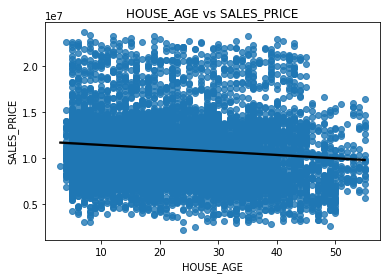

In [111]:
sns.regplot(x = chn_df['HOUSE_AGE'],y = chn_df.SALES_PRICE, line_kws = {'color' : 'black'});
plt.title("HOUSE_AGE vs SALES_PRICE")
ax = plt.gca()

### Inference


1.   Date sale and date build is used to create a new feature called "House Age"
2.   There is a slight linear relationship is a between HOUSE AGE and SALES_PRICE.
3.   Transformation can be tried.





### Transformation of HOUSE_AGE

### x^2

In [112]:
chn_df['HOUSE_AGE_transformed'] = np.square(chn_df['HOUSE_AGE'])

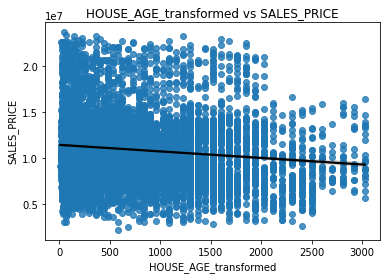

In [113]:
sns.regplot(x = chn_df['HOUSE_AGE_transformed'],y = chn_df.SALES_PRICE, line_kws = {'color' : 'black'});
plt.title("HOUSE_AGE_transformed vs SALES_PRICE")
ax = plt.gca()

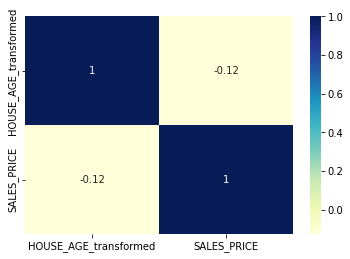

In [114]:
dataplot=sns.heatmap(chn_df[['HOUSE_AGE_transformed','SALES_PRICE']].corr(),cmap="YlGnBu", annot=True)

### x^3

In [115]:
chn_df['HOUSE_AGE_transformed_1'] = np.power(chn_df['HOUSE_AGE'],3)

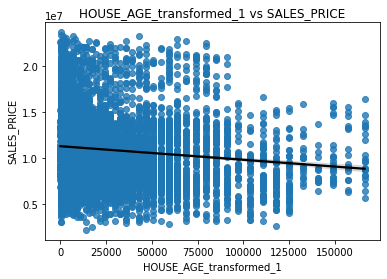

In [116]:
sns.regplot(x = chn_df['HOUSE_AGE_transformed_1'],y = chn_df.SALES_PRICE, line_kws = {'color' : 'black'});
plt.title("HOUSE_AGE_transformed_1 vs SALES_PRICE")
ax = plt.gca()

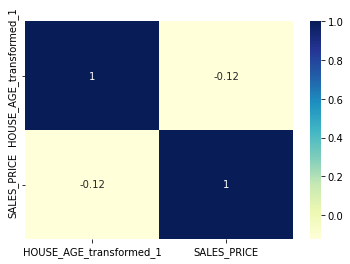

In [117]:
dataplot=sns.heatmap(chn_df[['HOUSE_AGE_transformed_1','SALES_PRICE']].corr(),cmap="YlGnBu", annot=True)

### x^0.5

In [118]:
chn_df['HOUSE_AGE_transformed_2'] = np.power(chn_df['HOUSE_AGE'],0.5)

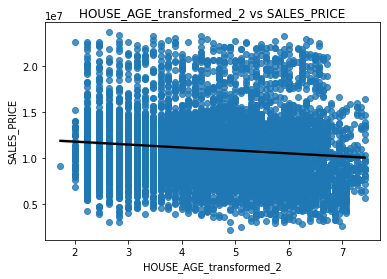

In [119]:
sns.regplot(x = chn_df['HOUSE_AGE_transformed_2'],y = chn_df.SALES_PRICE, line_kws = {'color' : 'black'});
plt.title("HOUSE_AGE_transformed_2 vs SALES_PRICE")
ax = plt.gca()

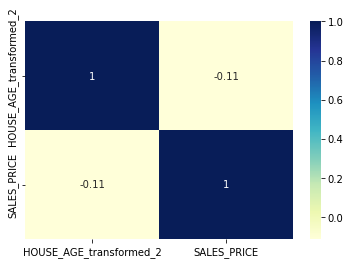

In [120]:
dataplot=sns.heatmap(chn_df[['HOUSE_AGE_transformed_2','SALES_PRICE']].corr(),cmap="YlGnBu", annot=True)

### log x

In [121]:
chn_df['HOUSE_AGE_transformed_3'] = np.log(chn_df['HOUSE_AGE'])

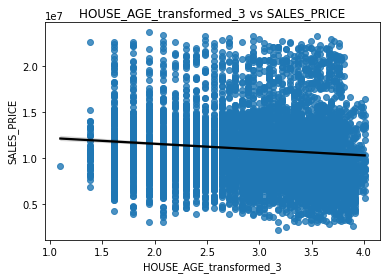

In [122]:
sns.regplot(x = chn_df['HOUSE_AGE_transformed_3'],y = chn_df.SALES_PRICE, line_kws = {'color' : 'black'});
plt.title("HOUSE_AGE_transformed_3 vs SALES_PRICE")
ax = plt.gca()

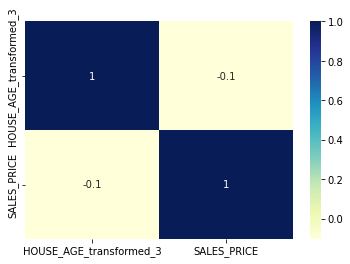

In [123]:
dataplot=sns.heatmap(chn_df[['HOUSE_AGE_transformed_3','SALES_PRICE']].corr(),cmap="YlGnBu", annot=True)

### Exponential

In [124]:
chn_df['HOUSE_AGE_transformed_4'] = np.exp(chn_df['HOUSE_AGE'])

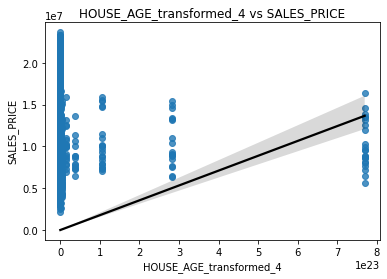

In [125]:
sns.regplot(x = chn_df['HOUSE_AGE_transformed_4'],y = chn_df.SALES_PRICE, line_kws = {'color' : 'black'});
plt.title("HOUSE_AGE_transformed_4 vs SALES_PRICE")
ax = plt.gca()

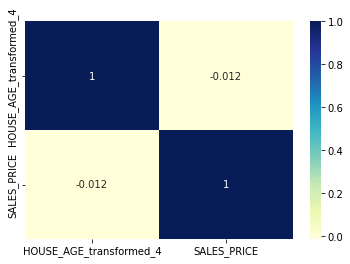

In [126]:
dataplot=sns.heatmap(chn_df[['HOUSE_AGE_transformed_4','SALES_PRICE']].corr(),cmap="YlGnBu", annot=True)

### Cosine

In [127]:
chn_df['HOUSE_AGE_transformed_5'] = np.cos(chn_df['HOUSE_AGE'])

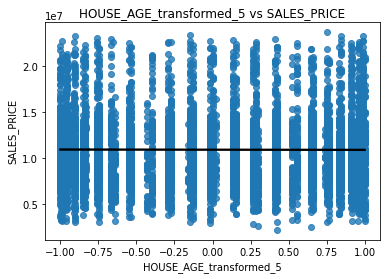

In [128]:
sns.regplot(x = chn_df['HOUSE_AGE_transformed_5'],y = chn_df.SALES_PRICE, line_kws = {'color' : 'black'});
plt.title("HOUSE_AGE_transformed_5 vs SALES_PRICE")
ax = plt.gca()

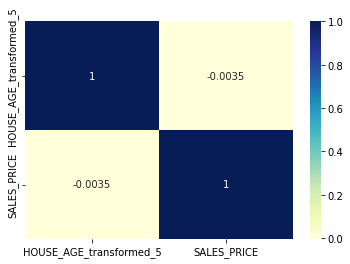

In [129]:
dataplot=sns.heatmap(chn_df[['HOUSE_AGE_transformed_5','SALES_PRICE']].corr(),cmap="YlGnBu", annot=True)

### Inference
None of the transformation worked. So, the column is dropped.



### BUILDTYPE

In [130]:
chn_df.BUILDTYPE.isna().sum()

0

In [131]:
chn_df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [132]:
chn_df.BUILDTYPE.replace({'Comercial' : 'Commercial', 'Other' : 'Others'},inplace = True)

In [133]:
chn_df.BUILDTYPE.value_counts()

House         2443
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

Text(0.5, 1.0, 'Distribution of BUILDTYPE')

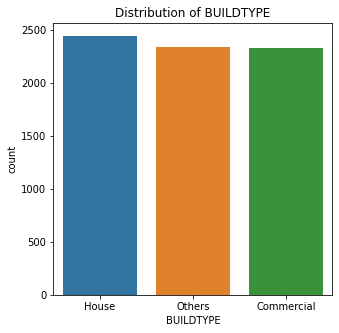

In [134]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="BUILDTYPE", data=chn_df, order = chn_df['BUILDTYPE'].value_counts().index)
plt.title("Distribution of BUILDTYPE")

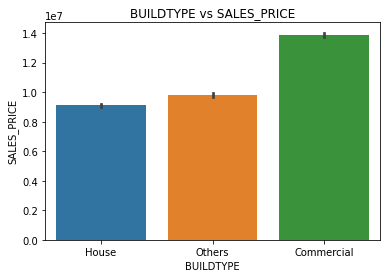

In [135]:
sns.barplot(x = chn_df.BUILDTYPE,y = chn_df.SALES_PRICE, order = chn_df.groupby(['BUILDTYPE'])['SALES_PRICE'].mean().reset_index().sort_values(['SALES_PRICE'])['BUILDTYPE']);
plt.title("BUILDTYPE vs SALES_PRICE")
ax = plt.gca()

Text(0.5, 1.0, 'Distribution of AREA with BUILDTYPE')

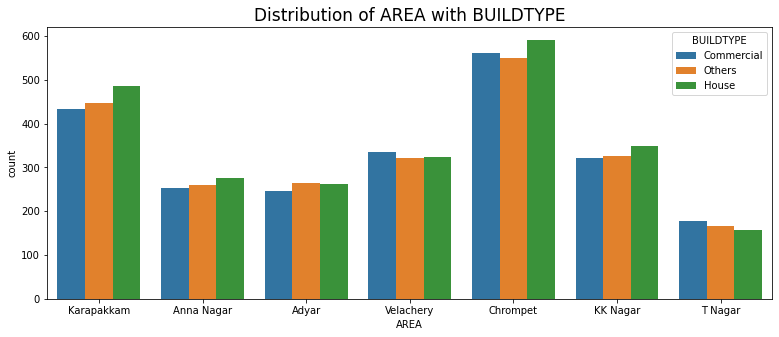

In [136]:
plt.figure(figsize=(13,5))
ax = sns.countplot(x ="AREA",hue = 'BUILDTYPE',data= chn_df)
plt.title('Distribution of AREA with BUILDTYPE', fontsize=17)

### Inference


1.   No Linear relationship between BUILDTYPE and SALES_PRICE.
2.   One hot Encoding is done(for linear regression),Label Encoding is done for other models.
3.   Sales of Houses are more than the Commercial and other type of buildings.




### UTILITY_AVAIL

In [137]:
chn_df.UTILITY_AVAIL.isna().sum()

0

In [138]:
chn_df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [139]:
chn_df.UTILITY_AVAIL.replace({'AllPub' : 'All Pub', 'NoSewr ' : 'No Sewer', 'NoSeWa' : 'No Sewage'},inplace = True)

In [140]:
chn_df.UTILITY_AVAIL.value_counts()

All Pub      1887
No Sewage    1871
No Sewer     1828
ELO          1522
Name: UTILITY_AVAIL, dtype: int64

Text(0.5, 1.0, 'Distribution of UTILITY_AVAIL')

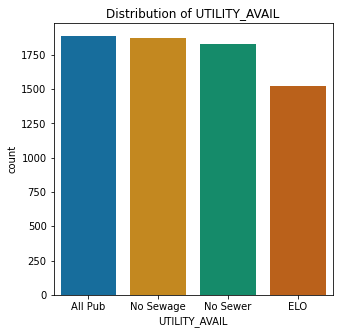

In [141]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="UTILITY_AVAIL", data=chn_df, order = chn_df['UTILITY_AVAIL'].value_counts().index, palette = 'colorblind')
plt.title("Distribution of UTILITY_AVAIL")

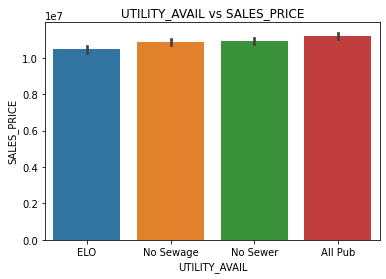

In [142]:
sns.barplot(x = chn_df.UTILITY_AVAIL,y = chn_df.SALES_PRICE, order = chn_df.groupby(['UTILITY_AVAIL'])['SALES_PRICE'].mean().reset_index().sort_values(['SALES_PRICE'])['UTILITY_AVAIL']);
plt.title("UTILITY_AVAIL vs SALES_PRICE")
ax = plt.gca()

### Inference


1.   There is a linear relationship between UTILITY_AVAIL and SALES_PRICE.
2.   Label encoding is done



### STREET

In [143]:
chn_df.STREET.isna().sum()

0

In [144]:
chn_df.STREET.unique()


array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [145]:
chn_df.STREET.replace({'Pavd' : 'Paved', 'NoAccess' : 'No Access'},inplace = True)

In [146]:
chn_df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2016
Name: STREET, dtype: int64

Text(0.5, 1.0, 'Distribution of STREET')

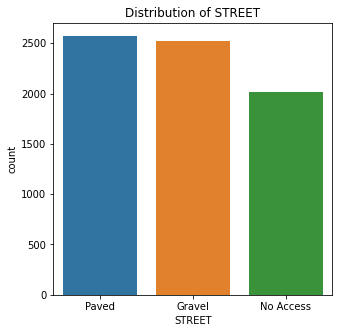

In [147]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="STREET", data=chn_df, order = chn_df['STREET'].value_counts().index)
plt.title("Distribution of STREET")

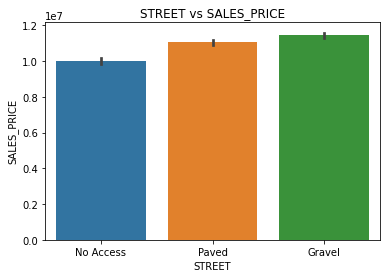

In [148]:
sns.barplot(x = chn_df.STREET,y = chn_df.SALES_PRICE, order = chn_df.groupby(['STREET'])['SALES_PRICE'].mean().reset_index().sort_values(['SALES_PRICE'])['STREET']);
plt.title("STREET vs SALES_PRICE")
ax = plt.gca()

### Inference


1.   Houses with Paved and Gravelled Streets are more popular.
2.   There is a linear relationship between STREET and SALES_PRICE.
3.   Label Encoding is done.



### MZZONE


In [149]:
chn_df.MZZONE.isna().sum()

0

In [150]:
chn_df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [151]:
chn_df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1816
C      550
A      537
I      525
Name: MZZONE, dtype: int64

Text(0.5, 1.0, 'Distribution of MZZONE')

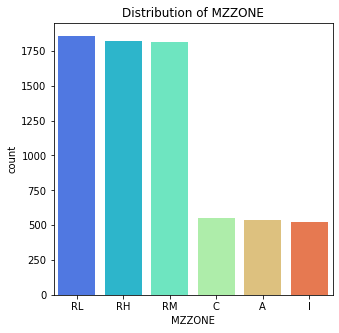

In [152]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="MZZONE", data=chn_df, palette = 'rainbow', order = chn_df['MZZONE'].value_counts().index)
plt.title("Distribution of MZZONE")

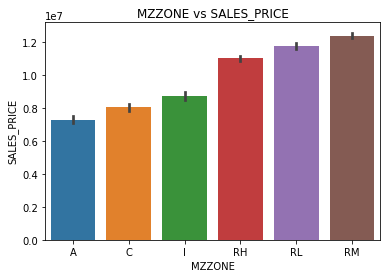

In [153]:
sns.barplot(x = chn_df.MZZONE,y = chn_df.SALES_PRICE, order = chn_df.groupby(['MZZONE'])['SALES_PRICE'].mean().reset_index().sort_values(['SALES_PRICE'])['MZZONE']);
plt.title("MZZONE vs SALES_PRICE")
ax = plt.gca()

### Inference


1.    People prefer to buy houses instead of buying Commercial, Agricultural and Industrial buildings. Residential areas with Low Density is more sought after.
2.   There is a linear relationship between MZZONE and SALES_PRICE.
3.   Label Encoding is done



### QS_ROOMS

In [154]:
chn_df.QS_ROOMS.isna().sum()

0

In [155]:
chn_df.QS_ROOMS.dtype

dtype('float64')

In [156]:
chn_df.QS_ROOMS.describe()

count    7108.000000
mean        3.517290
std         0.891905
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

In [157]:
q3 = chn_df.QS_ROOMS.quantile(0.75)
q1 = chn_df.QS_ROOMS.quantile(0.25)
iqr = q3 - q1
iqr

1.5999999999999996

In [158]:
q3 + 1.5*iqr

6.699999999999999

In [159]:
q1 - 1.5*iqr

0.3000000000000007

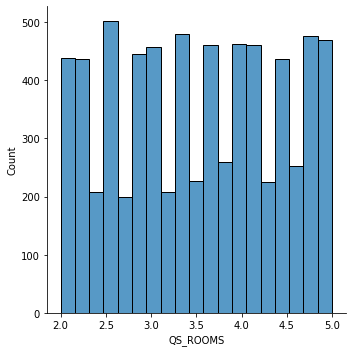

In [160]:
sns.displot(chn_df.QS_ROOMS)

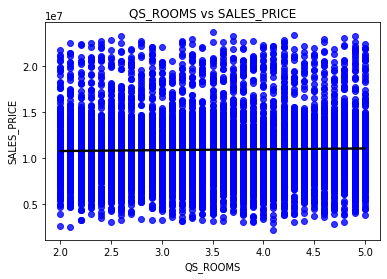

In [161]:
sns.regplot(x = chn_df.QS_ROOMS,y = chn_df.SALES_PRICE, line_kws = {'color' : 'black'}, scatter_kws = {'color' : 'blue'});
plt.title("QS_ROOMS vs SALES_PRICE")
ax = plt.gca()

### Inference


1.   There is no skew. No outliers. Looks like a uniform distribution
2.   No clear relationship between QS_ROOMS and SALES_PRICE.
Tranformation will not make much of a difference in this case.
3.   The column will be dropped for Linear Regression.



### QS_BATHROOM

In [162]:
chn_df.QS_BATHROOM.isna().sum()

0

In [163]:
chn_df.QS_BATHROOM.dtype

dtype('float64')

In [164]:
chn_df.QS_BATHROOM.describe()

count    7108.000000
mean        3.507358
std         0.897846
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

In [165]:
q3 = chn_df.QS_BATHROOM.quantile(0.75)
q1 = chn_df.QS_BATHROOM.quantile(0.25)
iqr = q3 - q1
iqr

1.5999999999999996

In [166]:
q3 + 1.5*iqr

6.699999999999999

In [167]:
q1 - 1.5*iqr

0.3000000000000007

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


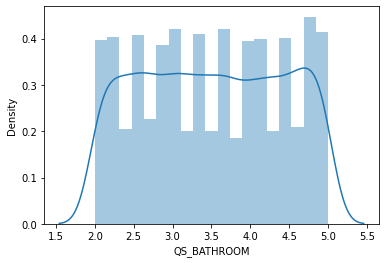

In [168]:
sns.distplot(chn_df.QS_BATHROOM)

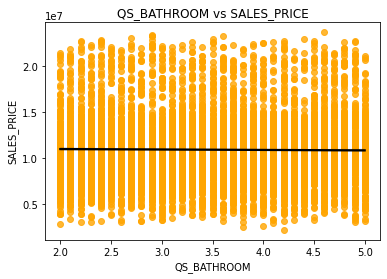

In [169]:
sns.regplot(x = chn_df.QS_BATHROOM,y = chn_df.SALES_PRICE, line_kws = {'color' : 'black'}, scatter_kws = {'color' : 'orange'});
plt.title("QS_BATHROOM vs SALES_PRICE")
ax = plt.gca()

### Inference


1.   It looks like a uniform distribution. No skew. No outliers
2.   No relationship between QS_BATHROOM and SALES_PRICE. Tranformation will not make much of a difference in this case.
3.   The column will be dropped for Linear Regression.



### QS_BEDROOM


In [170]:
chn_df.QS_BEDROOM.isna().sum()

0

In [171]:
chn_df.QS_BEDROOM.dtype

dtype('float64')

In [172]:
chn_df.QS_BEDROOM.describe()

count    7108.000000
mean        3.485509
std         0.887154
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BEDROOM, dtype: float64

In [173]:
q3 = chn_df.QS_BEDROOM.quantile(0.75)
q1 = chn_df.QS_BEDROOM.quantile(0.25)
iqr = q3 - q1
iqr

1.5999999999999996

In [174]:
q3 + 1.5*iqr

6.699999999999999

In [175]:
q1 - 1.5*iqr

0.3000000000000007

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


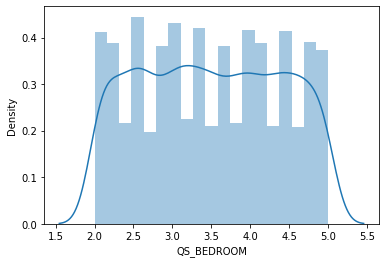

In [176]:
sns.distplot(chn_df.QS_BEDROOM)

It looks like a uniform distribution

No skew

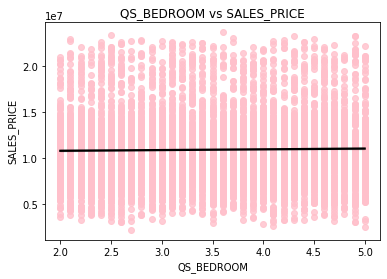

In [177]:
sns.regplot(x = chn_df.QS_BEDROOM,y = chn_df.SALES_PRICE, line_kws = {'color' : 'black'}, scatter_kws = {'color' : 'pink'});
plt.title("QS_BEDROOM vs SALES_PRICE")
ax = plt.gca()

### Inference


1.   It looks like a uniform distribution. No skew. No outliers
2.   No relationship between QS_BEDROOM and SALES_PRICE.
Tranformation will not make much of a difference in this case.
3.   The column will be dropped for Linear Regression.



### QS_OVERALL

In [178]:
chn_df.QS_OVERALL.sum()

24733.32

In [179]:
chn_df.QS_OVERALL.isna().sum()

48

In [180]:
chn_df.dropna(subset = ['QS_OVERALL'],inplace = True)
chn_df.reset_index(drop = True, inplace = True)

In [181]:
chn_df.QS_OVERALL.isna().sum()

0

In [182]:
chn_df.QS_OVERALL.dtype

dtype('float64')

In [183]:
chn_df.QS_OVERALL.describe()

count    7060.000000
mean        3.503303
std         0.527244
min         2.000000
25%         3.130000
50%         3.500000
75%         3.890000
max         4.970000
Name: QS_OVERALL, dtype: float64

In [184]:
q3 = chn_df.QS_OVERALL.quantile(0.75)
q1 = chn_df.QS_OVERALL.quantile(0.25)
iqr = q3 - q1
iqr

0.7600000000000002

In [185]:
q3 + 1.5*iqr

5.03

In [186]:
q1 - 1.5*iqr

1.9899999999999995

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


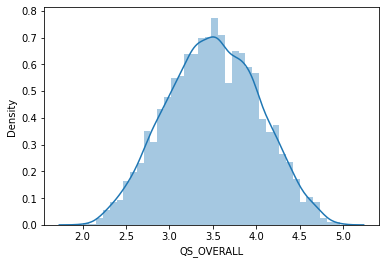

In [187]:
sns.distplot(chn_df.QS_OVERALL)

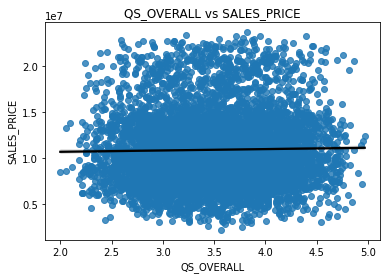

In [188]:
sns.regplot(x = chn_df.QS_OVERALL,y = chn_df.SALES_PRICE, line_kws = {'color' : 'black'});
plt.title("QS_OVERALL vs SALES_PRICE")
ax = plt.gca()

### Inference


1.   It looks like a normal distribution with no skew. No outliers.
2.   No relationship between QS_OVERALL and SALES_PRICE. Tranformation will not make much of a difference in this case.
3.   The column will be dropped for Linear Regression.



### SALES_PRICE


In [189]:
chn_df.SALES_PRICE.isna().sum()

0

In [190]:
chn_df.SALES_PRICE.dtype

dtype('int64')

In [191]:
chn_df.SALES_PRICE.describe()

count    7.060000e+03
mean     1.088845e+07
std      3.768585e+06
min      2.156875e+06
25%      8.268421e+06
50%      1.032038e+07
75%      1.298148e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [192]:
chn_df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'YEAR_SOLD', 'YEAR_BUILD', 'HOUSE_AGE',
       'HOUSE_AGE_transformed', 'HOUSE_AGE_transformed_1',
       'HOUSE_AGE_transformed_2', 'HOUSE_AGE_transformed_3',
       'HOUSE_AGE_transformed_4', 'HOUSE_AGE_transformed_5'],
      dtype='object')

In [193]:
chn_df.drop(['HOUSE_AGE_transformed','HOUSE_AGE_transformed_1','HOUSE_AGE_transformed_2','HOUSE_AGE_transformed_3', 'HOUSE_AGE_transformed_4', 'HOUSE_AGE_transformed_5'],axis = 1,inplace = True)

In [194]:
chn_df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'YEAR_SOLD', 'YEAR_BUILD', 'HOUSE_AGE'],
      dtype='object')

In [195]:
chn_df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SOLD,YEAR_BUILD,HOUSE_AGE
0,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,1,1967-05-15,...,4.0,3.9,4.9,4.330,380000,144400,7600000,2011,1967,44
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,...,4.9,4.2,2.5,3.765,760122,304049,21717770,2006,1995,11
2,Adyar,909,2012-02-04,70,1,1,3,AbNormal,1,1992-02-09,...,4.1,3.8,2.2,3.090,421094,92114,13159200,2012,1992,20
3,Velachery,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,...,4.7,3.9,3.6,4.010,356321,77042,9630290,2010,1988,22
4,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,1,1979-10-13,...,3.0,2.5,4.1,3.290,237000,74063,7406250,2009,1979,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7055,Karapakkam,598,2011-01-03,51,1,1,2,AdjLand,0,1962-01-15,...,3.0,2.2,2.4,2.520,208767,107060,5353000,2011,1962,49
7056,Velachery,1897,2004-04-08,52,3,2,5,Family,1,1995-04-11,...,3.6,4.5,3.3,3.920,346191,205551,10818480,2004,1995,9
7057,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,0,1978-09-01,...,4.3,4.2,2.9,3.840,317354,167028,8351410,2006,1978,28
7058,Karapakkam,787,2009-08-03,40,1,1,2,Partial,1,1977-08-11,...,4.6,3.8,4.1,4.160,425350,119098,8507000,2009,1977,32


### Ordinal categorical features -- Label encoding


In [196]:
data = pd.DataFrame()
data = chn_df

### AREA

In [197]:
data.AREA = data.AREA.map({'Karapakkam' : 1, 'Adyar' : 2, 'Chrompet' : 3, 'Velachery' : 4, 'KK Nagar' : 5, 'Anna Nagar' : 6, 'T Nagar' : 7})

### SALE_COND

In [198]:
data.SALE_COND = data.SALE_COND.map({'Partial' : 1, 'Family' : 2, 'AbNormal' : 3, 'Normal Sale' : 4, 'AdjLand' : 5})

### UTILITY_AVAIL

In [199]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.map({'ELO' : 1, 'No Sewage' : 2, 'No Sewer' : 3, 'All Pub' : 4})

### STREET

In [200]:
data.STREET = data.STREET.map({'No Access' : 1, 'Paved' : 2, 'Gravel' : 3})

### MZZONE

In [201]:
data.MZZONE = data.MZZONE.map({'A' : 1, 'C' : 2, 'I' : 3, 'RH' : 4, 'RL' : 5, 'RM' : 6})

### Nominal Categorical feature - One hot encoding


### BUILDTYPE

In [202]:
data =pd.get_dummies(data,columns=['BUILDTYPE'])
data

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,YEAR_SOLD,YEAR_BUILD,HOUSE_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,2011-05-04,131,1,1,3,3,1,1967-05-15,...,4.330,380000,144400,7600000,2011,1967,44,1,0,0
1,6,1986,2006-12-19,26,2,1,5,3,0,1995-12-22,...,3.765,760122,304049,21717770,2006,1995,11,1,0,0
2,2,909,2012-02-04,70,1,1,3,3,1,1992-02-09,...,3.090,421094,92114,13159200,2012,1992,20,1,0,0
3,4,1855,2010-03-13,14,3,2,5,2,0,1988-03-18,...,4.010,356321,77042,9630290,2010,1988,22,0,0,1
4,1,1226,2009-10-05,84,1,1,3,3,1,1979-10-13,...,3.290,237000,74063,7406250,2009,1979,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7055,1,598,2011-01-03,51,1,1,2,5,0,1962-01-15,...,2.520,208767,107060,5353000,2011,1962,49,0,0,1
7056,4,1897,2004-04-08,52,3,2,5,2,1,1995-04-11,...,3.920,346191,205551,10818480,2004,1995,9,0,0,1
7057,4,1614,2006-08-25,152,2,1,4,4,0,1978-09-01,...,3.840,317354,167028,8351410,2006,1978,28,0,1,0
7058,1,787,2009-08-03,40,1,1,2,1,1,1977-08-11,...,4.160,425350,119098,8507000,2009,1977,32,1,0,0


In [203]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE',
       'YEAR_SOLD', 'YEAR_BUILD', 'HOUSE_AGE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [204]:
data.drop(columns = ['YEAR_SOLD','YEAR_BUILD'],axis = 1,inplace = True)

In [205]:
df_encoded = data.copy(deep = True)
df_encoded.columns
#use df_encoded for other models(except for linear reg)

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE',
       'HOUSE_AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

In [206]:
data.drop(columns = ['DATE_SALE','DIST_MAINROAD','DATE_BUILD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','HOUSE_AGE'],axis = 1,inplace = True)

In [207]:
new_order = ['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others','SALES_PRICE']

In [208]:
data = data.reindex(columns = new_order)

In [209]:
data.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others',
       'SALES_PRICE'],
      dtype='object')

In [210]:
data

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,SALES_PRICE
0,1,1004,1,1,3,3,1,4,2,1,1,0,0,7600000
1,6,1986,2,1,5,3,0,4,3,4,1,0,0,21717770
2,2,909,1,1,3,3,1,1,3,5,1,0,0,13159200
3,4,1855,3,2,5,2,0,3,2,3,0,0,1,9630290
4,1,1226,1,1,3,3,1,4,3,2,0,0,1,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7055,1,598,1,1,2,5,0,1,1,6,0,0,1,5353000
7056,4,1897,3,2,5,2,1,2,1,4,0,0,1,10818480
7057,4,1614,2,1,4,4,0,2,3,3,0,1,0,8351410
7058,1,787,1,1,2,1,1,1,2,5,1,0,0,8507000


### Splitting

In [211]:
X = data.iloc[:,:-1]
y = data.loc[:,['SALES_PRICE']]

In [212]:
X.shape, y.shape

((7060, 13), (7060, 1))

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [214]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5648, 13), (5648, 1), (1412, 13), (1412, 1))

In [215]:
X_train

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
1190,5,1916,3,2,5,2,0,4,3,4,0,0,1
1273,1,1088,1,1,3,2,0,1,3,3,1,0,0
6030,4,1651,2,1,4,2,0,4,1,1,0,0,1
4161,2,817,1,1,3,1,0,2,2,6,1,0,0
3385,1,1243,1,1,3,3,1,3,1,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,6,1633,1,1,4,2,1,2,2,5,1,0,0
5192,7,1881,2,1,5,4,1,1,3,6,1,0,0
3980,2,1244,2,2,4,1,1,1,1,2,0,0,1
235,3,996,1,1,3,2,0,1,3,5,0,0,1


In [216]:
X_test

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
3679,7,1924,2,1,5,2,1,3,2,4,0,0,1
6899,3,1293,2,1,4,4,0,4,2,5,0,1,0
6520,3,958,1,1,3,1,0,1,1,4,1,0,0
2459,7,1642,1,1,4,5,0,3,2,4,0,1,0
4261,2,1120,1,1,3,3,1,2,3,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5471,5,1324,1,1,3,4,1,4,3,4,0,1,0
2688,5,1988,3,2,5,4,0,2,3,5,0,0,1
3486,3,1202,2,1,4,5,0,4,1,6,0,0,1
5866,5,1696,2,1,4,4,1,3,2,4,0,1,0


### Scaling

In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression Model


In [218]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [219]:
dummy = pd.DataFrame(regressor.coef_, columns = ['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND','PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE','BUILDTYPE_Commercial	', 'BUILDTYPE_House', 'BUILDTYPE_Others'], index=['Coefficient'])
coeff_df = dummy.T
coeff_df

,Coefficient
AREA,1.097573e+06
INT_SQFT,6.133372e+05
N_BEDROOM,-1.215908e+06
N_BATHROOM,1.047446e+05
N_ROOM,1.744030e+06
SALE_COND,2.185387e+05
PARK_FACIL,5.204416e+05
UTILITY_AVAIL,7.414617e+04
STREET,4.002162e+05
MZZONE,8.946776e+05


In [220]:
coeff_df = coeff_df.apply(np.absolute)

In [221]:
coeff_df['Coefficient']

AREA                      1.097573e+06
INT_SQFT                  6.133372e+05
N_BEDROOM                 1.215908e+06
N_BATHROOM                1.047446e+05
N_ROOM                    1.744030e+06
SALE_COND                 2.185387e+05
PARK_FACIL                5.204416e+05
UTILITY_AVAIL             7.414617e+04
STREET                    4.002162e+05
MZZONE                    8.946776e+05
BUILDTYPE_Commercial\t    1.356196e+06
BUILDTYPE_House           8.388527e+05
BUILDTYPE_Others          4.991116e+05
Name: Coefficient, dtype: float64

In [222]:
coeff_df.sort_values(['Coefficient'])

,Coefficient
UTILITY_AVAIL,7.414617e+04
N_BATHROOM,1.047446e+05
SALE_COND,2.185387e+05
STREET,4.002162e+05
BUILDTYPE_Others,4.991116e+05
PARK_FACIL,5.204416e+05
INT_SQFT,6.133372e+05
BUILDTYPE_House,8.388527e+05
MZZONE,8.946776e+05
AREA,1.097573e+06


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


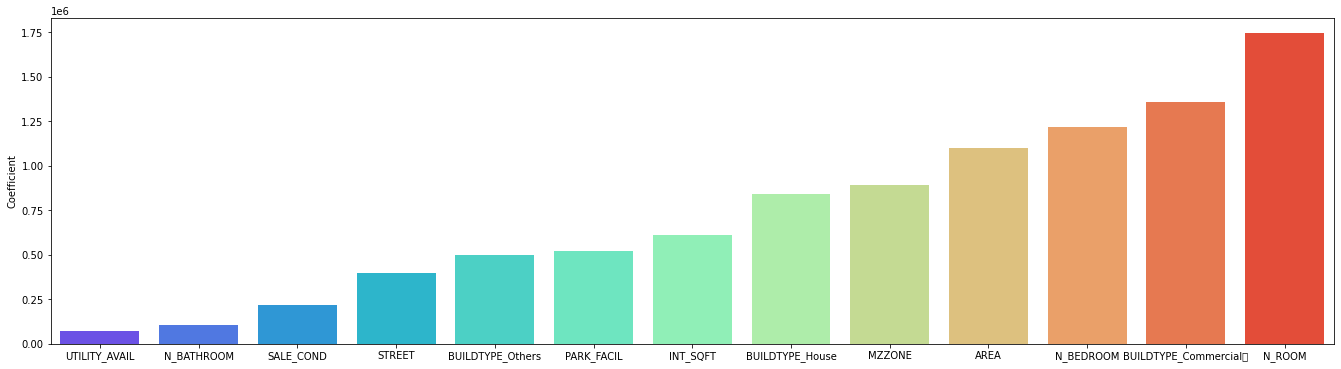

In [223]:
plt.figure(figsize=(23,6))
ax = sns.barplot(x=coeff_df.index,y = coeff_df['Coefficient'], data=coeff_df, palette = 'rainbow', order = coeff_df.sort_values(['Coefficient']).index)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


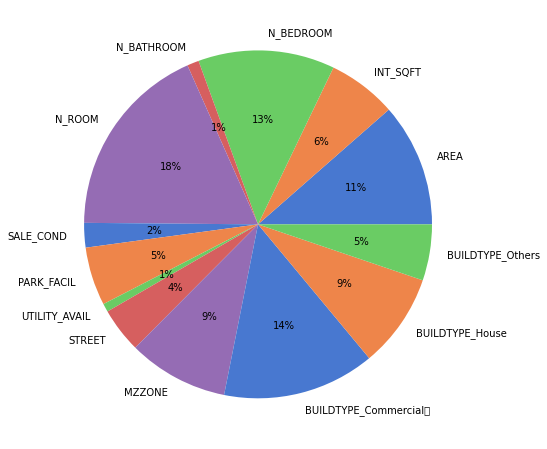

In [224]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('muted')[0:5]
plt.pie(x=coeff_df['Coefficient'].values, labels = coeff_df.index, colors = colors, autopct='%.0f%%')
plt.show()

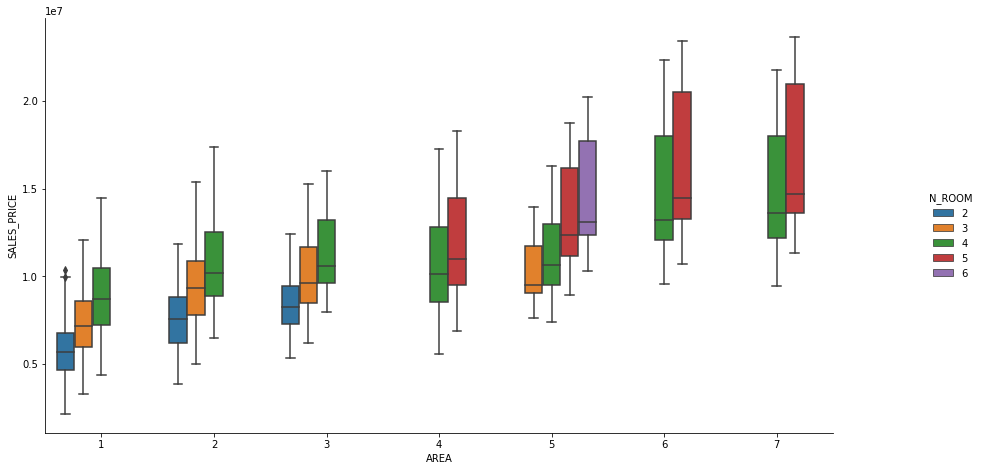

In [225]:
ax = sns.catplot(x="AREA", y="SALES_PRICE", hue="N_ROOM", data=data,kind = 'box')
plt.gcf().set_size_inches(15, 7)

### Karapakkam : 1, Adyar : 2, Chrompet : 3, Velachery : 4, KK Nagar : 5, Anna Nagar : 6, T Nagar : 7

In [226]:
regressor.coef_

array([[ 1097572.80463749,   613337.24124825, -1215908.44279719,
          104744.64005276,  1744030.41326763,   218538.67905036,
          520441.56016708,    74146.173186  ,   400216.1545429 ,
          894677.61858397,  1356196.45874084,  -838852.67855074,
         -499111.59974076]])

In [227]:
regressor.intercept_

array([10867906.38810198])

In [228]:
y_pred = regressor.predict(X_test)
y_pred

array([[14416797.43349723],
       [ 8723145.03205536],
       [10978935.868404  ],
       ...,
       [ 9541664.02321629],
       [10827654.61563857],
       [ 5402043.8171949 ]])

In [229]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression()

In [230]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()

0.919248041323384

### Interpretation


1.   According to the graph, N-ROOM has the highest coefficient. So N-ROOM is the most important feature.
2.   By increasing or decreasing the number of rooms, bedrooms there will be a considerable change in the sales price.
3.  On the other hand, Utility Available and Number of bathrooms do not have much of an impact in the sale price.
4.   Commercial buildings in Anna Nagar and T Nagar have the highest sales price.
5.    Houses in karapakkam seem to be most affrodable.




### Metrics

In [231]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9203805904232342


### KNN


In [232]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [233]:
knn_data = df_encoded.copy()
knn_data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE',
       'HOUSE_AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

In [234]:
knn_data.drop(columns = ['HOUSE_AGE','DATE_SALE','DATE_BUILD','REG_FEE','COMMIS'],axis = 1,inplace = True)

In [235]:
knn_data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'SALES_PRICE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

In [236]:
X_knn = knn_data.iloc[:,:-1]
y_knn = knn_data.loc[:,['SALES_PRICE']]

In [237]:
new_order1 = ['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL','BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others','SALES_PRICE']
knn_data = knn_data.reindex(columns = new_order1)

In [238]:
knn_data

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,SALES_PRICE
0,1,1004,131,1,1,3,3,1,4,2,1,4.0,3.9,4.9,4.330,1,0,0,7600000
1,6,1986,26,2,1,5,3,0,4,3,4,4.9,4.2,2.5,3.765,1,0,0,21717770
2,2,909,70,1,1,3,3,1,1,3,5,4.1,3.8,2.2,3.090,1,0,0,13159200
3,4,1855,14,3,2,5,2,0,3,2,3,4.7,3.9,3.6,4.010,0,0,1,9630290
4,1,1226,84,1,1,3,3,1,4,3,2,3.0,2.5,4.1,3.290,0,0,1,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7055,1,598,51,1,1,2,5,0,1,1,6,3.0,2.2,2.4,2.520,0,0,1,5353000
7056,4,1897,52,3,2,5,2,1,2,1,4,3.6,4.5,3.3,3.920,0,0,1,10818480
7057,4,1614,152,2,1,4,4,0,2,3,3,4.3,4.2,2.9,3.840,0,1,0,8351410
7058,1,787,40,1,1,2,1,1,1,2,5,4.6,3.8,4.1,4.160,1,0,0,8507000


In [239]:
X_knn.shape, y_knn.shape

((7060, 18), (7060, 1))

### Splitting, Scaling

In [240]:
from sklearn.model_selection import train_test_split
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=1)

In [241]:
X_knn_train.shape, y_knn_train.shape, X_knn_test.shape, y_knn_test.shape

((5648, 18), (5648, 1), (1412, 18), (1412, 1))

In [242]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_knn_train)
X_knn_train = scaler.transform(X_knn_train)
X_knn_test = scaler.transform(X_knn_test)

In [243]:
#Using cross_validation
for k in range(20):
    k = k + 1
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_knn_train, y_knn_train)
    print("K value  : " , k, " score : ", np.mean(cross_val_score(knn, X_knn_train, y_knn_train, cv=10)))

K value  :  1  score :  0.9022753793094122
K value  :  2  score :  0.930150173847246
K value  :  3  score :  0.9392696602891173
K value  :  4  score :  0.9436059961368632
K value  :  5  score :  0.9456272070716027
K value  :  6  score :  0.9465938940712103
K value  :  7  score :  0.9465666287947124
K value  :  8  score :  0.9471570773412289
K value  :  9  score :  0.9482038716970027
K value  :  10  score :  0.948820136286737
K value  :  11  score :  0.9490086022883153
K value  :  12  score :  0.9489164771843589
K value  :  13  score :  0.9490164470755008
K value  :  14  score :  0.948846465432885
K value  :  15  score :  0.9484653908631031
K value  :  16  score :  0.9484325610998191
K value  :  17  score :  0.9483186915469541
K value  :  18  score :  0.9480459027710154
K value  :  19  score :  0.9475293483131371
K value  :  20  score :  0.9472057208376856


In [244]:
##Finding the best value of 'K'
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':np.arange(1,21)}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=10)
model.fit(X_knn_train,y_knn_train)
model.best_params_

{'n_neighbors': 13}

In [245]:
#fitting the knn model with the best k - value
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(X_knn_train, y_knn_train)
y_knn_pred_1 = knn.predict(X_knn_test)

### Metrics

In [246]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_knn_test,y_knn_pred_1))

R2- SCORE: 0.9508255300465482


### Interpretation


1.   The R2 score for the knn model is very good.
2.   The model is performing well.



### Decision Tree

In [339]:
dt_data = chn_df.copy()

In [340]:
dt_data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'YEAR_SOLD', 'YEAR_BUILD', 'HOUSE_AGE'],
      dtype='object')

In [341]:
dt_data.drop(columns = ['DATE_SALE','DATE_BUILD','REG_FEE','COMMIS','YEAR_SOLD','YEAR_BUILD'],axis = 1,inplace = True)

In [342]:
dt_data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'HOUSE_AGE'],
      dtype='object')

In [343]:
dt_data.BUILDTYPE = dt_data.BUILDTYPE.map({'House' : 1, 'Others' : 2, 'Commercial' : 3})

In [344]:
dt_data.BUILDTYPE.dtype

dtype('int64')

In [345]:
dt_data

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,HOUSE_AGE
0,1,1004,131,1,1,3,3,1,3,4,2,1,4.0,3.9,4.9,4.330,7600000,44
1,6,1986,26,2,1,5,3,0,3,4,3,4,4.9,4.2,2.5,3.765,21717770,11
2,2,909,70,1,1,3,3,1,3,1,3,5,4.1,3.8,2.2,3.090,13159200,20
3,4,1855,14,3,2,5,2,0,2,3,2,3,4.7,3.9,3.6,4.010,9630290,22
4,1,1226,84,1,1,3,3,1,2,4,3,2,3.0,2.5,4.1,3.290,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7055,1,598,51,1,1,2,5,0,2,1,1,6,3.0,2.2,2.4,2.520,5353000,49
7056,4,1897,52,3,2,5,2,1,2,2,1,4,3.6,4.5,3.3,3.920,10818480,9
7057,4,1614,152,2,1,4,4,0,1,2,3,3,4.3,4.2,2.9,3.840,8351410,28
7058,1,787,40,1,1,2,1,1,3,1,2,5,4.6,3.8,4.1,4.160,8507000,32


In [346]:
new_order2 = ['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL','BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL','HOUSE_AGE','SALES_PRICE']
dt_data = dt_data.reindex(columns = new_order2)

In [347]:
dt_data

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,HOUSE_AGE,SALES_PRICE
0,1,1004,131,1,1,3,3,1,3,4,2,1,4.0,3.9,4.9,4.330,44,7600000
1,6,1986,26,2,1,5,3,0,3,4,3,4,4.9,4.2,2.5,3.765,11,21717770
2,2,909,70,1,1,3,3,1,3,1,3,5,4.1,3.8,2.2,3.090,20,13159200
3,4,1855,14,3,2,5,2,0,2,3,2,3,4.7,3.9,3.6,4.010,22,9630290
4,1,1226,84,1,1,3,3,1,2,4,3,2,3.0,2.5,4.1,3.290,30,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7055,1,598,51,1,1,2,5,0,2,1,1,6,3.0,2.2,2.4,2.520,49,5353000
7056,4,1897,52,3,2,5,2,1,2,2,1,4,3.6,4.5,3.3,3.920,9,10818480
7057,4,1614,152,2,1,4,4,0,1,2,3,3,4.3,4.2,2.9,3.840,28,8351410
7058,1,787,40,1,1,2,1,1,3,1,2,5,4.6,3.8,4.1,4.160,32,8507000


In [348]:
X_dt = dt_data.iloc[:,:-1]
y_dt = dt_data.loc[:,['SALES_PRICE']]

### Splitting, Scaling

In [349]:
from sklearn.model_selection import train_test_split
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=1)

In [350]:
X_dt_train.shape, y_dt_train.shape, X_dt_test.shape, y_dt_test.shape

((5648, 17), (5648, 1), (1412, 17), (1412, 1))

### Model

In [351]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_dt_train, y_dt_train)
dt.predict(X_dt_test)
y_dt_pred = dt.predict(X_dt_test)

In [352]:
y_dt_pred

array([14737720.,  9817160., 10834880., ..., 10474605., 11222760.,
        6309980.])

In [353]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_dt_test,y_dt_pred))

R2- SCORE: 0.9634135187282097


### Avoiding overfitting

In [354]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40]:
    dt = DecisionTreeRegressor(max_depth=depth,random_state = 1) 
    dt.fit(X_dt_train, y_dt_train)
    trainAccuracy = metrics.r2_score(y_train, dt.predict(X_dt_train))
    dt = DecisionTreeRegressor(max_depth=depth, random_state = 0)
    valAccuracy = cross_val_score(dt, X_dt_train, y_dt_train, cv=10, scoring = make_scorer(metrics.r2_score))
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.3668067991011221  Cross val score :  0.3643395913776876
Depth  :  2  Training Accuracy :  0.6874393991078256  Cross val score :  0.6859222702269765
Depth  :  3  Training Accuracy :  0.8040781988838899  Cross val score :  0.8024280875672455
Depth  :  4  Training Accuracy :  0.8871690388744595  Cross val score :  0.8824389320924528
Depth  :  5  Training Accuracy :  0.9222926909920578  Cross val score :  0.9158690797184198
Depth  :  6  Training Accuracy :  0.9439669253039276  Cross val score :  0.9372826376608373
Depth  :  7  Training Accuracy :  0.9597957738531635  Cross val score :  0.9499831804328573
Depth  :  8  Training Accuracy :  0.9729338024451887  Cross val score :  0.958975970980965
Depth  :  9  Training Accuracy :  0.9827150202637489  Cross val score :  0.962952036750972
Depth  :  10  Training Accuracy :  0.9898027449516879  Cross val score :  0.9642380526795022
Depth  :  20  Training Accuracy :  0.999999999953808  Cross val score :  0.962679

Depth = 10 has the best cross_val score which is 0.964

### Feature Importance

In [355]:
from matplotlib import pyplot
dt = DecisionTreeRegressor(max_depth = 10, random_state = 0)
dt.fit(X_dt_train, y_dt_train)
importance = dt.feature_importances_

#Calculating feature importance based on Information Gain:
list(zip(importance,X_dt_test.columns))

[(0.48851478423038486, 'AREA'),
 (0.11144907312365918, 'INT_SQFT'),
 (0.0005324939234360192, 'DIST_MAINROAD'),
 (5.390706361408998e-05, 'N_BEDROOM'),
 (0.0013672586452404263, 'N_BATHROOM'),
 (1.3743859734693929e-05, 'N_ROOM'),
 (0.0009532287929690165, 'SALE_COND'),
 (0.015350671439223744, 'PARK_FACIL'),
 (0.3293995427815014, 'BUILDTYPE'),
 (0.0004480778834469634, 'UTILITY_AVAIL'),
 (0.010325490866907561, 'STREET'),
 (0.037481503561867066, 'MZZONE'),
 (0.0003646074794803167, 'QS_ROOMS'),
 (0.0006380231183175964, 'QS_BATHROOM'),
 (0.0006138961245004316, 'QS_BEDROOM'),
 (0.0004227010479982188, 'QS_OVERALL'),
 (0.0020709960577184466, 'HOUSE_AGE')]

In [356]:
df_features = pd.DataFrame(list(zip(importance,X_dt_test.columns)), columns = ['importance', 'features'])
df_features

,importance,features
0,0.488515,AREA
1,0.111449,INT_SQFT
2,0.000532,DIST_MAINROAD
3,0.000054,N_BEDROOM
4,0.001367,N_BATHROOM
5,0.000014,N_ROOM
6,0.000953,SALE_COND
7,0.015351,PARK_FACIL
8,0.329400,BUILDTYPE
9,0.000448,UTILITY_AVAIL


### Plotting the decision tree

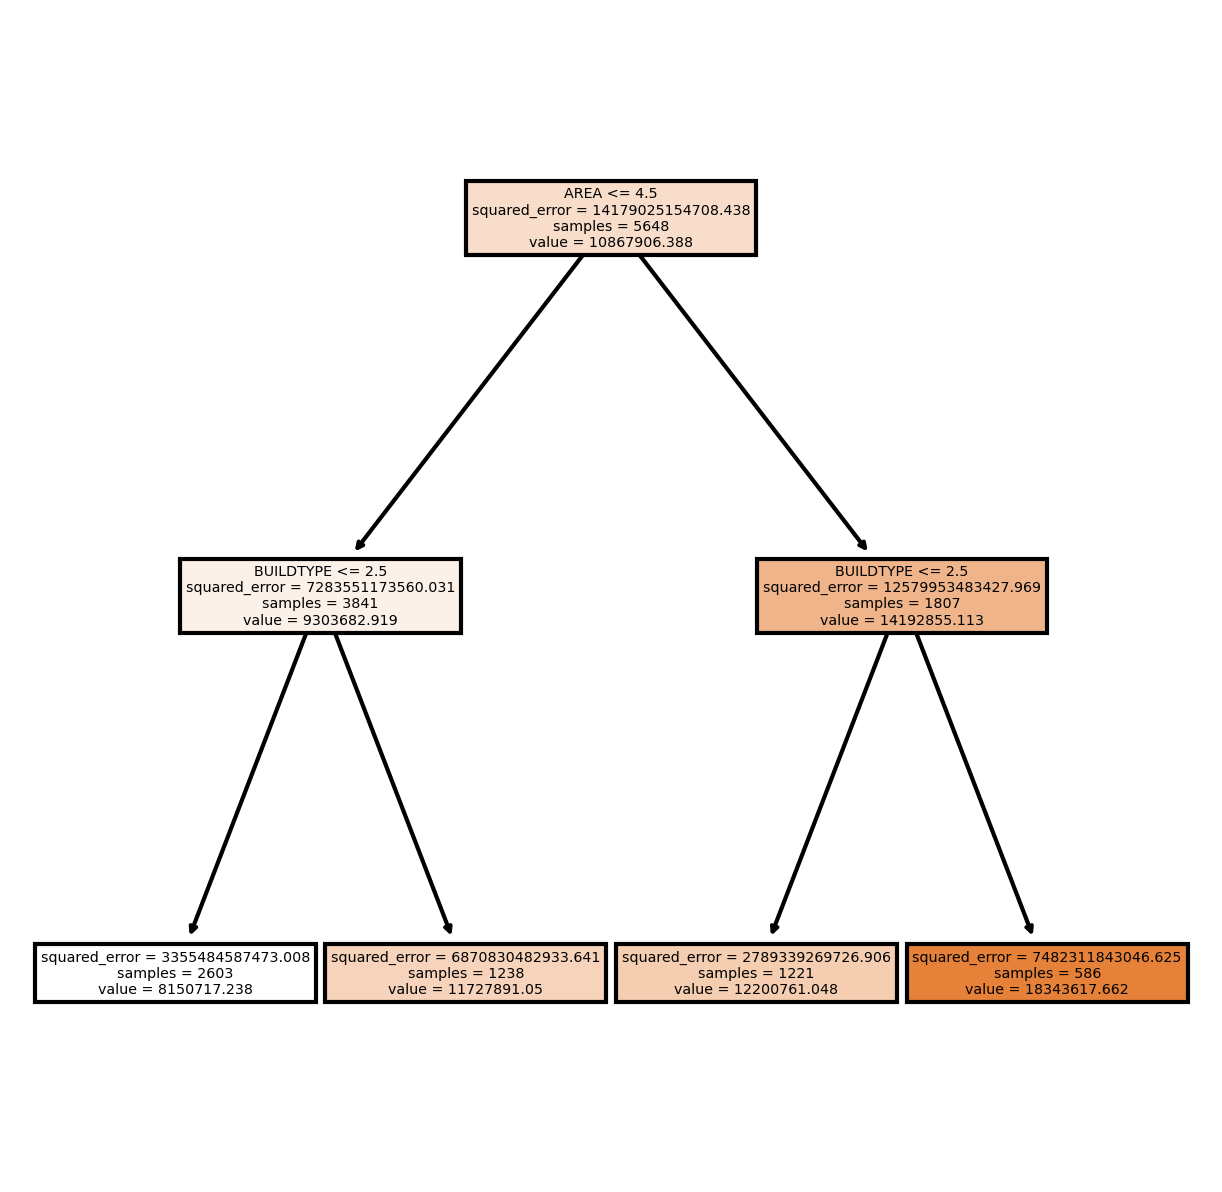

In [357]:
from sklearn import tree
dt = DecisionTreeRegressor(max_depth = 2, random_state = 1)
dt.fit(X_dt_train, y_dt_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(dt, feature_names = X_dt_test.columns, filled = True)
plt.show()

### Random Forest


In [358]:
X_rf = dt_data.iloc[:,:-1]
y_rf = dt_data.loc[:,['SALES_PRICE']]

In [359]:
X_rf_list = list(X_rf.columns)
X_rf_list

['AREA',
 'INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'HOUSE_AGE']

### Splitting

In [361]:
from sklearn.model_selection import train_test_split
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_rf_train,np.ravel(y_rf_train))
y_rf_pred = rf.predict(X_rf_test)

### Model


In [362]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_rf_train,np.ravel(y_rf_train))
y_rf_pred = rf.predict(X_rf_test)

### Metrics

In [363]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_rf_test,y_rf_pred))

R2- SCORE: 0.840729988692895


In [368]:
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_rf_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: BUILDTYPE            Importance: 0.26
Variable: AREA                 Importance: 0.24
Variable: INT_SQFT             Importance: 0.23
Variable: N_ROOM               Importance: 0.13
Variable: MZZONE               Importance: 0.08
Variable: N_BEDROOM            Importance: 0.04
Variable: N_BATHROOM           Importance: 0.01
Variable: PARK_FACIL           Importance: 0.01
Variable: HOUSE_AGE            Importance: 0.01
Variable: DIST_MAINROAD        Importance: 0.0
Variable: SALE_COND            Importance: 0.0
Variable: UTILITY_AVAIL        Importance: 0.0
Variable: STREET               Importance: 0.0
Variable: QS_ROOMS             Importance: 0.0
Variable: QS_BATHROOM          Importance: 0.0
Variable: QS_BEDROOM           Importance: 0.0
Variable: QS_OVERALL           Importance: 0.0


In [369]:
df_rf_feature_importances = pd.DataFrame(feature_importances, columns = ['features','importance'])
df_rf_feature_importances

,features,importance
0,BUILDTYPE,0.26
1,AREA,0.24
2,INT_SQFT,0.23
3,N_ROOM,0.13
4,MZZONE,0.08
5,N_BEDROOM,0.04
6,N_BATHROOM,0.01
7,PARK_FACIL,0.01
8,HOUSE_AGE,0.01
9,DIST_MAINROAD,0.00


### Modelling with 5 important features

In [370]:
rf_most_important = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')

important_indices = [X_rf_list.index('BUILDTYPE'), X_rf_list.index('AREA'), X_rf_list.index('INT_SQFT'), X_rf_list.index('N_ROOM'),X_rf_list.index('MZZONE')]
train_important = X_rf_train.iloc[:, important_indices]
test_important = X_rf_test.iloc[:, important_indices]

rf_most_important.fit(train_important, np.ravel(y_rf_train))

predictions = rf_most_important.predict(test_important)

print('R2- SCORE:', metrics.r2_score(y_rf_test,predictions))

R2- SCORE: 0.9025274108361097


### Interpretation


1.   The r2 score for the random forest model was 0.84.
But after modelling with only 5 most important features the r2 score increased to 0.90
2.   BUILDTYPE is the most important feature according to this model.



### XG BOOST


In [371]:
X_xg = dt_data.iloc[:,:-1]
y_xg = dt_data.loc[:,['SALES_PRICE']]

### Splitting

In [373]:
from sklearn.model_selection import train_test_split
X_xg_train, X_xg_test, y_xg_train, y_xg_test = train_test_split(X_xg, y_xg, test_size=0.2, random_state=1)

In [374]:
X_xg_train.shape, X_xg_test.shape, y_xg_train.shape, y_xg_test.shape

((5648, 17), (1412, 17), (5648, 1), (1412, 1))

In [375]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Model

In [376]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
    model.fit(X_xg_train,y_xg_train) 
    model.score(X_xg_test, y_xg_test) 
    print("Learning rate : ", lr, " Train score : ", model.score(X_xg_train,y_xg_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_xg_train,y_xg_train, cv=10)))


Learning rate :  0.01  Train score :  -0.3774846526859428  Cross-Val score :  -0.3861913227286018
Learning rate :  0.02  Train score :  0.7471668175644137  Cross-Val score :  0.7431051106800227
Learning rate :  0.03  Train score :  0.925272821770668  Cross-Val score :  0.9223994381954228
Learning rate :  0.04  Train score :  0.962178073163637  Cross-Val score :  0.9600511385737118
Learning rate :  0.05  Train score :  0.9744151464474303  Cross-Val score :  0.9723278850325145
Learning rate :  0.06  Train score :  0.9804971531328329  Cross-Val score :  0.9787427145994079
Learning rate :  0.07  Train score :  0.9850270630842252  Cross-Val score :  0.9832332644426989
Learning rate :  0.08  Train score :  0.9880664217067887  Cross-Val score :  0.9863741616451136
Learning rate :  0.09  Train score :  0.9902238217747816  Cross-Val score :  0.9888612405211378
Learning rate :  0.1  Train score :  0.9921276315422256  Cross-Val score :  0.9905000733482583
Learning rate :  0.11  Train score :  0.9

The best learning rate is 0.7 because it has the highest cross-val score - 0.9965



### Fitting the model with best learning rate

In [380]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(X_xg_train,y_xg_train) #train the model
y_xg_pred = model.predict(X_xg_test)
print(model.score(X_xg_test, y_xg_test))

[17:51:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9973969796011565


### Metrics

In [381]:
print('R2- SCORE:', metrics.r2_score(y_xg_test,y_xg_pred))

R2- SCORE: 0.9973969796011565


In [382]:
xg_importances = list(model.feature_importances_)
xg_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_rf_list, xg_importances)]

xg_feature_importances = sorted(xg_feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in xg_feature_importances];

Variable: AREA                 Importance: 0.4300000071525574
Variable: BUILDTYPE            Importance: 0.25999999046325684
Variable: PARK_FACIL           Importance: 0.09000000357627869
Variable: N_ROOM               Importance: 0.05000000074505806
Variable: STREET               Importance: 0.05000000074505806
Variable: MZZONE               Importance: 0.05000000074505806
Variable: INT_SQFT             Importance: 0.03999999910593033
Variable: N_BATHROOM           Importance: 0.019999999552965164
Variable: SALE_COND            Importance: 0.009999999776482582
Variable: DIST_MAINROAD        Importance: 0.0
Variable: N_BEDROOM            Importance: 0.0
Variable: UTILITY_AVAIL        Importance: 0.0
Variable: QS_ROOMS             Importance: 0.0
Variable: QS_BATHROOM          Importance: 0.0
Variable: QS_BEDROOM           Importance: 0.0
Variable: QS_OVERALL           Importance: 0.0
Variable: HOUSE_AGE            Importance: 0.0


In [383]:
xg_feature_importances = pd.DataFrame(xg_feature_importances, columns = ['features','importance'])
xg_feature_importances

,features,importance
0,AREA,0.43
1,BUILDTYPE,0.26
2,PARK_FACIL,0.09
3,N_ROOM,0.05
4,STREET,0.05
5,MZZONE,0.05
6,INT_SQFT,0.04
7,N_BATHROOM,0.02
8,SALE_COND,0.01
9,DIST_MAINROAD,0.00


### FINAL INTERPRETATION/INFERENCE





After analysing the feature importance in all the models, below are the features that are most important to predict the SALES_PRICE.


1.   BUILDTYPE
2.   AREA
3.   INT_SQFT
4.   N_ROOM
5.   N_BEDROOM
6.   MZZONE

### MODEL SELECTION
1.  After analysing the r2_score of all the models, XG BOOST has the highest score - 0.997.

2. XG BOOST is the best model to predict sales price for this problem.

### Generating Forecast Range

In [384]:
from sklearn.ensemble import GradientBoostingRegressor

In [385]:
mid_model = GradientBoostingRegressor(random_state = 1,learning_rate = 0.7, n_estimators=100, max_depth = 4)
mid_model.fit(X_xg_train,np.ravel(y_xg_train))

GradientBoostingRegressor(learning_rate=0.7, max_depth=4, random_state=1)

In [386]:
upper_model = GradientBoostingRegressor(random_state = 1, alpha = 0.9, loss = 'quantile', learning_rate = 0.7, n_estimators=100, max_depth = 4)
upper_model.fit(X_xg_train,np.ravel(y_xg_train)) 

GradientBoostingRegressor(learning_rate=0.7, loss='quantile', max_depth=4,
                          random_state=1)

In [387]:
lower_model = GradientBoostingRegressor(random_state = 1, alpha = 0.05, loss = 'quantile', learning_rate = 0.7, n_estimators=100, max_depth = 4)
lower_model.fit(X_xg_train,np.ravel(y_xg_train)) 

GradientBoostingRegressor(alpha=0.05, learning_rate=0.7, loss='quantile',
                          max_depth=4, random_state=1)

In [388]:
y_mid_gb = mid_model.predict(X_xg_test)
metrics.r2_score(y_xg_test,y_mid_gb)

0.9926207206017685

In [389]:
y_upper_gb = upper_model.predict(X_xg_test)
y_lower_gb = lower_model.predict(X_xg_test)

In [396]:
predictions = pd.DataFrame(y_xg_test)
predictions

,SALES_PRICE,lower,mid,upper
3679,14480950,1.429342e+07,1.477861e+07,1.483904e+07
6899,9815400,9.791765e+06,1.080059e+07,9.943743e+06
6520,10001300,1.078440e+07,9.639430e+06,1.037144e+07
2459,11228760,1.080442e+07,1.107320e+07,1.124711e+07
4261,10439690,9.887660e+06,1.037813e+07,1.067776e+07
...,...,...,...,...
5471,9187560,8.888487e+06,9.454899e+06,9.076080e+06
2688,11466600,1.169076e+07,1.210584e+07,1.205118e+07
3486,10428940,1.056883e+07,1.054504e+07,1.111080e+07
5866,9719120,9.619458e+06,9.429416e+06,1.007438e+07


In [392]:
predictions['lower'] = lower_model.predict(X_xg_test)
predictions['mid'] = mid_model.predict(X_xg_test)
predictions['upper'] = upper_model.predict(X_xg_test)

In [393]:
y_lower_pred = lower_model.predict(X_xg_test)
y_mid_pred = mid_model.predict(X_xg_test)
y_upper_pred = upper_model.predict(X_xg_test)

In [394]:
predictions = predictions.rename(columns = {'SALES_PRICE' : 'actual','lower' : 'lower limit','mid' : 'predicted','upper' : 'upper limit'})
predictions

,actual,lower limit,predicted,upper limit
3679,14480950,1.429342e+07,1.477861e+07,1.483904e+07
6899,9815400,9.791765e+06,1.080059e+07,9.943743e+06
6520,10001300,1.078440e+07,9.639430e+06,1.037144e+07
2459,11228760,1.080442e+07,1.107320e+07,1.124711e+07
4261,10439690,9.887660e+06,1.037813e+07,1.067776e+07
...,...,...,...,...
5471,9187560,8.888487e+06,9.454899e+06,9.076080e+06
2688,11466600,1.169076e+07,1.210584e+07,1.205118e+07
3486,10428940,1.056883e+07,1.054504e+07,1.111080e+07
5866,9719120,9.619458e+06,9.429416e+06,1.007438e+07


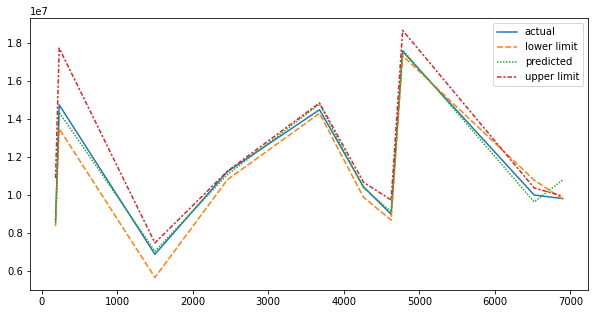

In [395]:
plt.figure(figsize=(10,5))
sns.lineplot(data = predictions[:10])